# PRESENTADO POR:

- David Armendáriz Peña
- Juan Sebastian Ávila Árias
- David López Atehortúa
- Camilo Alejandro Vélez Medina
- Andrés Puerta González


# Problemas del 1 al 6


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import collections
import pandas as pd
from scipy import stats

1. Suponga que se cuenta con una prueba para detectar la enfermedad A, que es positiva el 90%
   de las veces cuando se realiza en un paciente que tiene dicha enfermedad, y es negativa el 95%
   de las veces cuando se realiza en una persona que no tiene la enfermedad. También se sabe que
   la enfermedad afecta a un 1% de la población.

2. Construya una muestra aleatoria de tamaño 100000, que contenga “Sí” y “No”, con
   probabilidades de 1% y 99%, respectivamente.


In [2]:
n = 100000


def crear_muestra_aleatoria():
    return random.choices(["Sí", "No"], k=n, weights=[0.01, 0.99])

In [3]:
muestra = crear_muestra_aleatoria()

df = pd.DataFrame({"Infectado": muestra})
df.head()

,Infectado
0,No
1,No
2,No
3,No
4,No


In [4]:
df.value_counts()

Infectado
No           98977
Sí            1023
dtype: int64

In [5]:
def calcular_probabilidad(muestra):
    contador = collections.Counter(muestra)
    return (contador["Sí"] / len(muestra), contador["No"] / len(muestra))


muestra = crear_muestra_aleatoria()
probabilidad = calcular_probabilidad(muestra)

print(probabilidad)

(0.00957, 0.99043)


3. Construya una muestra aleatoria a partir del vector de valores (“Negativo” y “Positivo”), que
   de cuenta de que la probabilidad de que el test salga “Negativo” dado que “No” tiene la
   enfermedad A es del 95%. Presente tablas de contingencia cruzadas condicionadas de acuerdo
   con si tiene o no tiene la enfermedad.


In [6]:
# Agregar la columna "testNegativo_DadoNo" basada en las reglas de probabilidad
df["testNegativo_DadoNo"] = np.where(
    (df["Infectado"] == "No")
    & (np.random.rand(n) > 0.948)
    & (np.random.rand(n) <= 0.95),
    "Negativo",
    "Positivo",
)

# Verificar la proporción final de "Resultado_test"
proporcion_resultado = df["testNegativo_DadoNo"].value_counts(normalize=True)
print(proporcion_resultado)

Positivo    0.95071
Negativo    0.04929
Name: testNegativo_DadoNo, dtype: float64


In [7]:
# Tabla de contingencia cruzada
df[df["Infectado"] == "No"].groupby(["Infectado", "testNegativo_DadoNo"])[
    ["Infectado"]
].count()

Infectado
Infectado testNegativo_DadoNo           
No        Negativo                  4929
          Positivo                 94048

4. Construya una muestra aleatoria a partir del vector de valores (“Negativo” y “Positivo”), que
   de cuenta de que la probabilidad de que el test salga “Positivo” dado que “Sí” tiene la
   enfermedad A es del 90%. Presente tablas de contingencia cruzadas condicionadas de acuerdo
   con si tiene o no tiene la enfermedad.


In [8]:
# Agregar la columna "testPositivo_DadoSi" basada en las reglas de probabilidad
df["testPositivo_DadoSi"] = np.where(
    (df["Infectado"] == "Sí") & (np.random.rand(n) > 0.89) & (np.random.rand(n) < 0.9),
    "Positivo",
    "Negativo",
)

# Verificar la proporción final de "Resultado_test"
proporcion_resultado = df["testPositivo_DadoSi"].value_counts(normalize=True)
print(proporcion_resultado)

Negativo    0.999
Positivo    0.001
Name: testPositivo_DadoSi, dtype: float64


In [9]:
# Tabla de contingencia cruzada
df[df["Infectado"] == "Sí"].groupby(["Infectado", "testPositivo_DadoSi"])[
    ["Infectado"]
].count()

Infectado
Infectado testPositivo_DadoSi           
Sí        Negativo                   923
          Positivo                   100

In [10]:
# Agregar la columna "Resultado_test" basada en ambas reglas de probabilidad
df["Resultado_test"] = np.where(
    (df["Infectado"] == "Sí") & (np.random.rand(n) < 0.9), "Positivo", "Negativo"
)
df.loc[
    (df["Infectado"] == "No") & (np.random.rand(n) < 0.05), "Resultado_test"
] = "Positivo"

# Verificar la proporción final de "Resultado_test"
proporcion_resultado = df["Resultado_test"].value_counts(normalize=True)
print(proporcion_resultado)

Negativo    0.94119
Positivo    0.05881
Name: Resultado_test, dtype: float64


In [11]:
df = df[["Infectado", "Resultado_test"]]
df

,Infectado,Resultado_test
0,No,Negativo
1,No,Negativo
2,No,Negativo
3,No,Negativo
4,No,Negativo
...,...,...
99995,No,Negativo
99996,No,Negativo
99997,No,Negativo
99998,No,Negativo


In [12]:
df.groupby(["Infectado", "Resultado_test"])[["Resultado_test"]].count()

Resultado_test
Infectado Resultado_test                
No        Negativo                 94021
          Positivo                  4956
Sí        Negativo                    98
          Positivo                   925

In [13]:
df.groupby(["Resultado_test", "Infectado"])[["Resultado_test"]].count()

Resultado_test
Resultado_test Infectado                
Negativo       No                  94021
               Sí                     98
Positivo       No                   4956
               Sí                    925

In [14]:
df

,Infectado,Resultado_test
0,No,Negativo
1,No,Negativo
2,No,Negativo
3,No,Negativo
4,No,Negativo
...,...,...
99995,No,Negativo
99996,No,Negativo
99997,No,Negativo
99998,No,Negativo


5. Calcule la probabilidad de tener la enfermedad dado que el test salió positivo. Realice los
   cálculos utilizando las variables simuladas.


In [15]:
pacientes_infectados_positivos = df[
    (df["Infectado"] == "Sí") & (df["Resultado_test"] == "Positivo")
]
pacientes_infectados_positivos = pacientes_infectados_positivos.shape[0]

pacientes_positivos = df[df["Resultado_test"] == "Positivo"]
pacientes_positivos = pacientes_positivos.shape[0]


probabilidad_infectado_verdadero_positivo = (
    pacientes_infectados_positivos / pacientes_positivos
)

print(f"Infectados con test positivo: {pacientes_infectados_positivos}")
print(f"Total test positivos: {pacientes_positivos}")
print(
    f"Probabilidad de estar infectado con test positivo:  {probabilidad_infectado_verdadero_positivo}"
)

Infectados con test positivo: 925
Total test positivos: 5881
Probabilidad de estar infectado con test positivo:  0.1572861758204387


6. Realice los cálculos del punto anterior, utilizando la información del enunciado y el Teorema
   de Bayes. ¿Qué puede concluir?


In [16]:
# Probabilidad de tener la enfermedad (P(Enfermedad))
p_enfermedad = 0.01

# Probabilidad de obtener un resultado positivo en el test dado que se tiene la enfermedad (P(Positivo | Enfermedad))
p_positivo_enfermedad = 0.9

# Probabilidad de no tener la enfermedad (P(¬Enfermedad))
p_no_enfermedad = 1 - p_enfermedad

# Probabilidad de obtener un resultado positivo en el test dado que no se tiene la enfermedad (P(Positivo | ¬Enfermedad))
p_positivo_no_enfermedad = 0.05

# Probabilidad de obtener un resultado positivo en el test (P(Positivo))
p_positivo = (p_positivo_enfermedad * p_enfermedad) + (
    p_positivo_no_enfermedad * p_no_enfermedad
)

# Probabilidad de tener la enfermedad dado que el test salió positivo (P(Enfermedad | Positivo))
p_enfermedad_positivo = (p_positivo_enfermedad * p_enfermedad) / p_positivo

print(
    "Probabilidad de tener la enfermedad dado que el test salió positivo:",
    p_enfermedad_positivo,
)

Probabilidad de tener la enfermedad dado que el test salió positivo: 0.15384615384615385


Identificamos que el resultado obtenido por metodo experimental y aplicando el teorema de Naive bayes concluye un resultado similar en la problabilidad de tener la enfermedad dado que el test salió positivo:

experimental: 0.1572861758204387

naive: 0.15384615384615385

diferencia: 0.003440021974284835

# Problema 7


Simule 1000 valores para cada una de las distribuciones de probabilidad uniforme discreta, binomial, Poisson, uniforme continua, normal y Exponencial. Especifique libremente los parámetros para cada una de ellas. Encuentre media y desviación estándar muestral para cada uno de los vectores simulados y compare dichos resultados con los obtenidos con las fórmulas de valor esperado y desviación estándar teoricos.


In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Distribución de probabilidad uniforme discreta


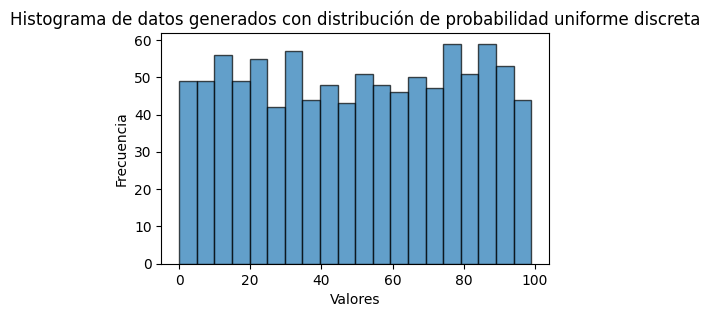

In [18]:
N = 1000
a_uniforme_discreta = 0
b_uniforme_discreta = 100

dpud = np.random.randint(low=a_uniforme_discreta, high=b_uniforme_discreta, size=N)

plt.figure(figsize=(5, 3))
plt.hist(dpud, bins=20, edgecolor="k", alpha=0.7)
plt.xlabel("Valores")
plt.ylabel("Frecuencia")
plt.title(
    "Histograma de datos generados con distribución de probabilidad uniforme discreta"
)

# Mostrar la gráfica
plt.show()

### Distribución de probabilidad binomial


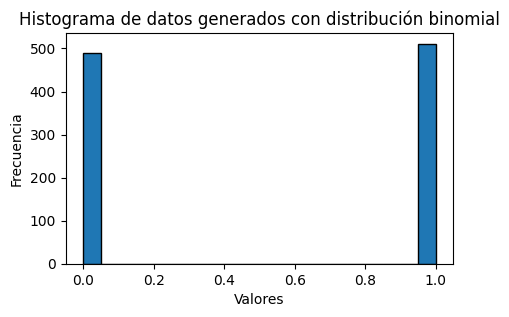

In [19]:
n_binomial = 1
p_binomial = 0.5

dpb = np.random.binomial(n=n_binomial, p=p_binomial, size=N)

plt.figure(figsize=(5, 3))
plt.hist(dpb, bins=20, edgecolor="k")
plt.xlabel("Valores")
plt.ylabel("Frecuencia")
plt.title("Histograma de datos generados con distribución binomial")

# Mostrar la gráfica
plt.show()

### Distribución de probabilidad poisson


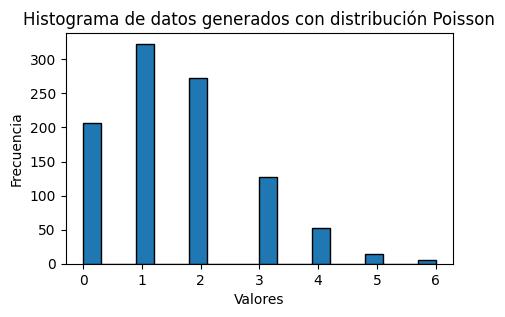

In [20]:
lmbda_poisson = 1.5
dpp = np.random.poisson(lam=lmbda_poisson, size=N)

plt.figure(figsize=(5, 3))
plt.hist(dpp, bins=20, edgecolor="k")
plt.xlabel("Valores")
plt.ylabel("Frecuencia")
plt.title("Histograma de datos generados con distribución Poisson")

# Mostrar la gráfica
plt.show()

### Distribuicón uniforme continua


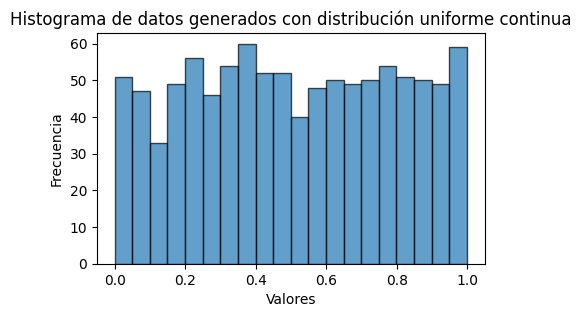

In [21]:
a_uniforme_continua = 0
b_uniforme_continua = 1
duc = np.random.uniform(low=a_uniforme_continua, high=b_uniforme_continua, size=N)

plt.figure(figsize=(5, 3))
plt.hist(duc, bins=20, edgecolor="k", alpha=0.7)
plt.xlabel("Valores")
plt.ylabel("Frecuencia")
plt.title("Histograma de datos generados con distribución uniforme continua")

# Mostrar la gráfica
plt.show()

### Distribuicón normal


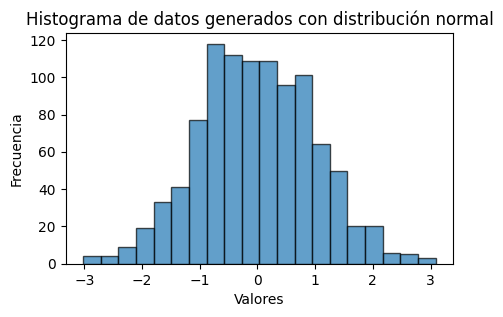

In [22]:
mu_normal = 0
sigma_normal = 1

dnorm = np.random.normal(loc=mu_normal, scale=sigma_normal, size=N)

plt.figure(figsize=(5, 3))
plt.hist(dnorm, bins=20, edgecolor="k", alpha=0.7)
plt.xlabel("Valores")
plt.ylabel("Frecuencia")
plt.title("Histograma de datos generados con distribución normal")

# Mostrar la gráfica
plt.show()

### Distribución Exponencial


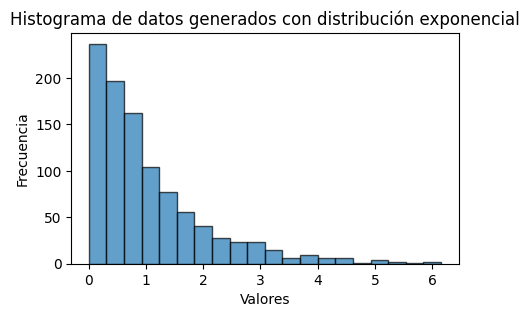

In [23]:
lmbda_exponencial = 1
dexp = np.random.exponential(scale=lmbda_exponencial, size=N)


plt.figure(figsize=(5, 3))
plt.hist(dexp, bins=20, edgecolor="k", alpha=0.7)
plt.xlabel("Valores")
plt.ylabel("Frecuencia")
plt.title("Histograma de datos generados con distribución exponencial")

# Mostrar la gráfica
plt.show()

### Media y Desviación Estándar de las muestras simuladas


In [24]:
df_resumen = pd.DataFrame(
    {
        "dist_prob_unif_dis": dpud,
        "dist_prob_binom": dpb,
        "dist_prob_poisson": dpp,
        "dist_prob_unif_cont": duc,
        "dist_prob_norm": dnorm,
        "dist_prob_exp": dexp,
    }
)
df_resumen.describe()

,dist_prob_unif_dis,dist_prob_binom,dist_prob_poisson,dist_prob_unif_cont,dist_prob_norm,dist_prob_exp
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.832000,0.511000,1.556000,0.507950,-0.011520,1.041087
std,29.152593,0.500129,1.223258,0.288655,1.002677,1.010964
min,0.000000,0.000000,0.000000,0.000063,-3.020338,0.001350
25%,24.000000,0.000000,1.000000,0.263694,-0.712410,0.329887
50%,50.000000,1.000000,1.000000,0.500505,-0.043634,0.740207
75%,76.000000,1.000000,2.000000,0.762837,0.710309,1.393236
max,99.000000,1.000000,6.000000,0.999035,3.087114,6.151414


### Valores esperados teóricos


In [25]:
# Calcula los valores esperados teóricos (medias) para cada distribución
mu_uniforme_discreta = (a_uniforme_discreta + b_uniforme_discreta) / 2
mu_binomial = n_binomial * p_binomial
mu_poisson = lmbda_poisson
mu_uniforme_continua = (a_uniforme_continua + b_uniforme_continua) / 2
mu_normal_teorico = mu_normal  # En la distribución normal, mu es igual al valor teórico
mu_exponencial = 1 / lmbda_exponencial
#
# Imprime los valores esperados teóricos
print("Valor Esperado Teórico para Uniforme Discreta:", mu_uniforme_discreta)
print("Valor Esperado Teórico para Binomial:", mu_binomial)
print("Valor Esperado Teórico para Poisson:", mu_poisson)
print("Valor Esperado Teórico para Uniforme Continua:", mu_uniforme_continua)
print("Valor Esperado Teórico para Normal:", mu_normal_teorico)
print("Valor Esperado Teórico para Exponencial:", mu_exponencial)

Valor Esperado Teórico para Uniforme Discreta: 50.0
Valor Esperado Teórico para Binomial: 0.5
Valor Esperado Teórico para Poisson: 1.5
Valor Esperado Teórico para Uniforme Continua: 0.5
Valor Esperado Teórico para Normal: 0
Valor Esperado Teórico para Exponencial: 1.0


En general, se encuentra que a medida que aumentas el tamaño de la muestra (en este caso, 1000 valores), los valores muestrales se acerca cada vez más a los valores teóricos. Este es un ejemplo de la Ley de los Grandes Números. Los resultados pueden variar un poco debido a la naturaleza estocástica de las simulaciones, pero en general se acercan a los valores teóricos a medida que aumentes el tamaño de la muestra.


# Problema 8


Realice secuencialmente la simulación del lanzamiento de un dado, de manera que en cada
lanzamiento encuentre la proporción de veces que sale el número 5 (es decir, vamos a estimar
de manera secuencial con el enfoque frecuentista del evento que al lanzar un dado se obtenga
el número 5). Comente los resultados de cómo es la probabilidad cuando se hacen: 2
lanzamientos, 6 lanzamientos, 10 lanzamientos, 100 lanzamientos, 1000 lanzamientos. ¿La
proporción de veces que sale el dado es equivalente a la teórica? Adicionalmente, construya
un gráfico donde se evidencie la evolución de la proporción vs la cantidad de veces que se
lanza el dado, interprete los resultados


In [26]:
import numpy as np
import pandas as pd

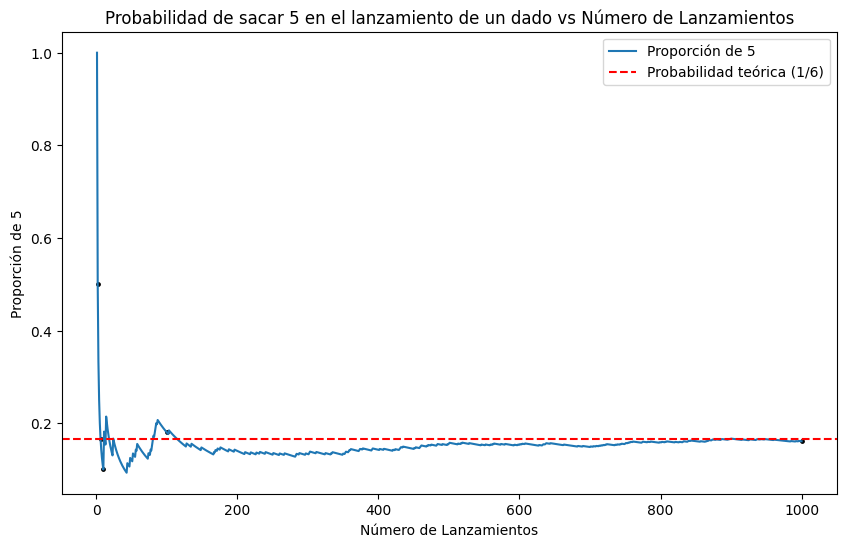

In [27]:
np.random.seed(0)  # Establecer una semilla aleatoria para reproducibilidad
num_lanzamientos = 1000  # Número total de lanzamientos
lanzamientos = np.random.randint(
    1, 7, size=num_lanzamientos
)  # Simulación de lanzamientos
proporciones = []  # Almacenar la proporción de 5 en cada etapa
puntos_interes = [
    2,
    6,
    10,
    100,
    1000,
]  # Puntos de interés para agregar puntos en el gráfico

# Realizar la simulación secuencial
contador_cinco = 0  # Inicializar el contador de 5
for i in range(num_lanzamientos):
    if lanzamientos[i] == 5:
        contador_cinco += 1
    proporciones.append(
        contador_cinco / (i + 1)
    )  # Calcular la proporción en cada etapa

# Crear un DataFrame para Plotly Express
df = pd.DataFrame(
    {"Lanzamientos": range(1, num_lanzamientos + 1), "Proporción de 5": proporciones}
)

# Agregar puntos de interés
puntos_df = df[df["Lanzamientos"].isin(puntos_interes)]

# Calcular la probabilidad teórica
probabilidad_teorica = 1 / 6

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(df["Lanzamientos"], df["Proporción de 5"], label="Proporción de 5")

# Add the theoretical probability line
plt.axhline(
    y=probabilidad_teorica,
    color="red",
    linestyle="--",
    label="Probabilidad teórica (1/6)",
)

# Add scatter points
plt.scatter(puntos_df["Lanzamientos"], puntos_df["Proporción de 5"], color="black", s=6)

# Set the labels and title
plt.xlabel("Número de Lanzamientos")
plt.ylabel("Proporción de 5")
plt.title(
    "Probabilidad de sacar 5 en el lanzamiento de un dado vs Número de Lanzamientos"
)

# Show legend
plt.legend()

# Show the plot
plt.show()

Los resultados muestran que, a medida que aumentas el número de lanzamientos, la proporción tiende a acercarse a la probabilidad teórica. Con un número suficientemente grande de lanzamientos, la proporción se aproximará cada vez más a 1/6, que es la probabilidad teórica de obtener un 5 en un dado justo.


# Problema 9


Realice la simulación de 10000 conjuntos de datos diferentes provenientes de una distribución (desarrolle el ejercicio primero utilizando la distribución uniforme y posteriormente una exponencial, utilice los parámetros que desee de las distribuciones), obteniendo 1000 muestras de cada conjunto de datos. Luego, va a obtener el promedio en cada uno de los conjuntos de datos y proceda a analizar la distribución de las medias obtenidas. ¿Qué evidencia en los histogramas? ¿A cuál de las distribuciones de la clase se le asemeja dicha distribución?


In [28]:
import numpy as np
import matplotlib.pyplot as plt

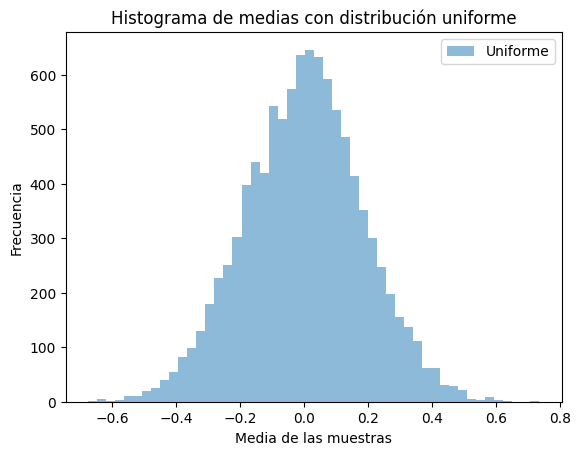

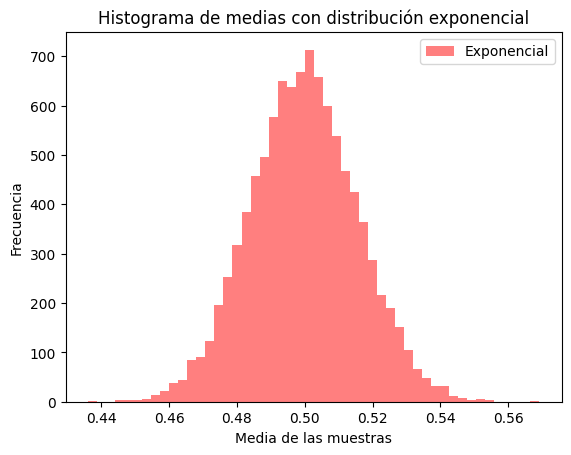

In [29]:
# Configuración de la simulación
num_simulations = 10000
sample_size = 1000

# Distribución uniforme
uniform_means = []

for i in range(num_simulations):
    data = np.random.uniform(-10, 10, sample_size)
    sample_mean = np.mean(data)
    uniform_means.append(sample_mean)

# Distribución exponencial
exponential_means = []

for i in range(num_simulations):
    data = np.random.exponential(0.5, sample_size)
    sample_mean = np.mean(data)
    exponential_means.append(sample_mean)

# Histograma de las medias con distribución uniforme
plt.hist(uniform_means, bins=50, alpha=0.5, label="Uniforme")
plt.xlabel("Media de las muestras")
plt.ylabel("Frecuencia")
plt.title("Histograma de medias con distribución uniforme")
plt.legend()
plt.show()

# Histograma de las medias con distribución exponencial
plt.hist(exponential_means, bins=50, alpha=0.5, color="red", label="Exponencial")
plt.xlabel("Media de las muestras")
plt.ylabel("Frecuencia")
plt.title("Histograma de medias con distribución exponencial")
plt.legend()
plt.show()

Es evidente que la frecuencia de la distribución de medias tiende a tomar una distribución normal alrededor de la media que se le indique en la función generadora de la distribución aleatoria. También se nota que pueden haber algunas desviaciones por lo que este parametro no es estricto.

Además, según el Teorema del Límite Central, las distribuciones de las medias se asemejarán a una distribución normal, independientemente de la distribución original. Sin embargo, la velocidad a la que se asemejan a una distribución normal puede variar según la distribución original y el número de muestras. Cuanto mayor sea el número de muestras, más rápido se asemejará la distribución de medias a una distribución normal.

En el caso de la distribución uniforme, las medias se asemejarán más rápidamente a una distribución normal debido a la simetría de la distribución uniforme. En el caso de la distribución exponencial, podría tomar más muestras para que las medias se asemejen completamente a una distribución normal debido a la asimetría de la distribución exponencial.


# Problema 10


![image.png](images/enunciado_problema_10.png)


In [30]:
import numpy as np
import matplotlib.pyplot as plt

In [31]:
def crear_distri_norm(mu_normal, sigma_normal, N):
    dnorm = np.random.normal(loc=mu_normal, scale=sigma_normal, size=N)
    plt.figure(figsize=(5, 3))
    plt.hist(dnorm, bins=20, edgecolor="k", alpha=0.7)
    plt.xlabel("Valores")
    plt.ylabel("Frecuencia")
    plt.title(f"Histograma de datos generados con distribución normal para n={N}")
    plt.show()
    return dnorm

In [32]:
def comparacion_medias(distribucion):
    n = len(distribucion)
    m = np.mean(distribucion)
    m_ses = (100 * n) / ((n**2) + 1) + m
    return m_ses, m

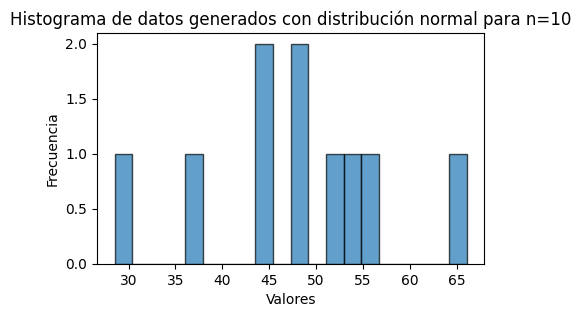

la media sesgada es: 57.4784655202979
la media habitual es: 47.577475421288
la diferencia de medias es: 9.900990099009903


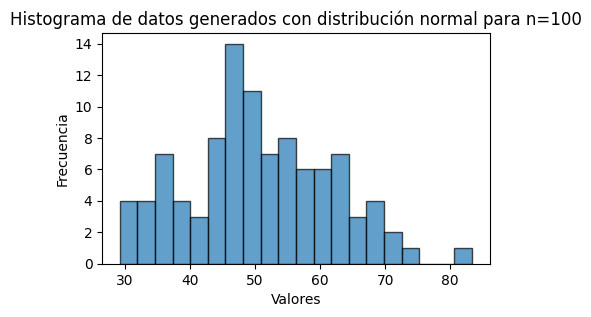

la media sesgada es: 51.704993561137265
la media habitual es: 50.70509355113826
la diferencia de medias es: 0.9999000099990027


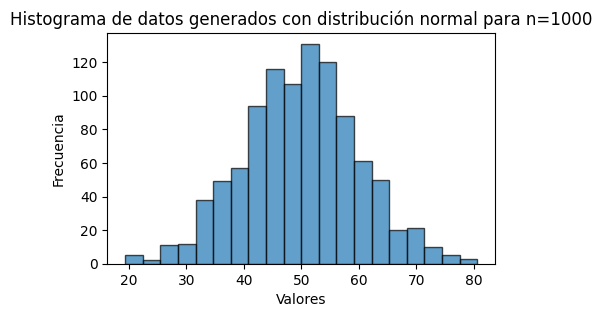

la media sesgada es: 50.01997531151028
la media habitual es: 49.91997541151018
la diferencia de medias es: 0.09999990000009973


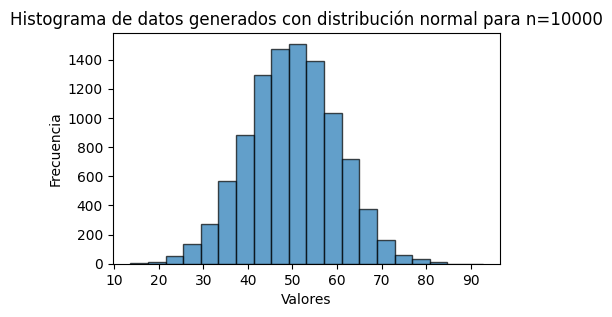

la media sesgada es: 49.975554184752546
la media habitual es: 49.96555418485254
la diferencia de medias es: 0.009999999900003331


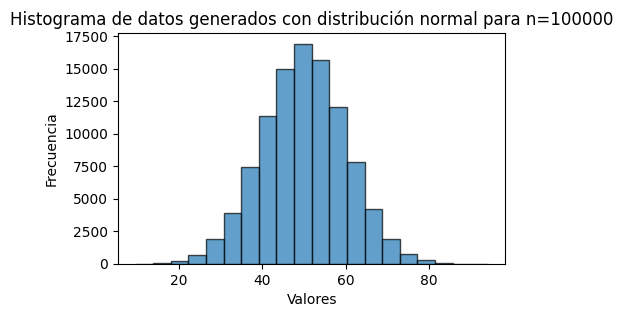

la media sesgada es: 49.97772454780176
la media habitual es: 49.976724547801865
la diferencia de medias es: 0.0009999999998981934


In [33]:
for i in [10, 100, 1000, 10000, 100000]:
    media_sesgada, media = comparacion_medias(crear_distri_norm(50, 10, i))
    print(f"la media sesgada es: {media_sesgada}")
    print(f"la media habitual es: {media}")
    print(f"la diferencia de medias es: {media_sesgada - media}")

Los resultados variarán de una ejecución a otra debido a la aleatoriedad de las simulaciones, pero en general, puedes esperar lo siguiente:

1. El estimador Y suele mostrar un sesgo más grande en comparación con el estimador promedio para todos los tamaños de muestra. Esto se debe a la estructura del nuevo estimador Y, que contiene un término adicional que no está presente en el estimador promedio.

2. A medida que el tamaño de muestra aumenta, ambos estimadores tienden a acercarse al valor verdadero de la media, lo que es consistente con la ley de los grandes números.

3. El estimador Y tiene una tendencia a sobreestimar la media, lo que se refleja en un sesgo positivo. Esto es más evidente en tamaños de muestra pequeños.

En conclusión, el nuevo estimador Y tiene un sesgo positivo y tiende a sobreestimar la media en comparación con el estimador promedio. Sin embargo, a medida que el tamaño de muestra aumenta, ambos estimadores convergen hacia el valor verdadero de la media.


# Problema 11


![image.png](images/enunciado_problema_11.png)


In [34]:
import numpy as np

In [35]:
def exponential_distribution(lambda_, n):
    return np.random.exponential(scale=1 / lambda_, size=n)


def first_estimator(data):
    return data[0]


def second_estimator(data):
    result = np.sum(data) - data[len(data) - 1]
    return result / (len(data) - 1)


def third_estimator(data):
    return np.mean(data)


def fourth_estimator(data):
    return np.min(data)

In [36]:
lambda_ = 1
data_lengths = [10, 100, 1000]
for length in data_lengths:
    data = exponential_distribution(lambda_, length)
    print(f"First estimator with {length} data points:", first_estimator(data))
    print(f"Second estimator with {length} data points", second_estimator(data))
    print(f"Third estimatorwith {length} data points", third_estimator(data))
    print(f"Fourth estimator with {length} data points", fourth_estimator(data))
    print("-------------------------------------------------------")

First estimator with 10 data points: 0.9806937159622771
Second estimator with 10 data points 0.8413030157342959
Third estimatorwith 10 data points 1.1765306563646412
Fourth estimator with 10 data points 0.09598457826864273
-------------------------------------------------------
First estimator with 100 data points: 0.9044791082810959
Second estimator with 100 data points 0.8201936720061501
Third estimatorwith 100 data points 0.8210924419445479
Fourth estimator with 100 data points 0.0017210969097680503
-------------------------------------------------------
First estimator with 1000 data points: 0.2561164890843233
Second estimator with 1000 data points 1.0210273033970167
Third estimatorwith 1000 data points 1.0200710509997333
Fourth estimator with 1000 data points 0.002255618209913511
-------------------------------------------------------


Debido a que escogimos un lambda = 1, el estimador muestra que más se acerca es el tercero cuando hay 1000 puntos.
El estimador que menos se acerca en cualquier caso es el cuarto estimador.
El segundo estimador también se acerca bastante cuando hay 1000 puntos.
El primer estimador parece alejarse del valor real a medida que aumenta el número de puntos.


# Problema 12


Considere el archivo SolicitudesDiarias.csv, en el cual se encuentran la cantidad de solicitudes
diarias hechas en una institución de financiera por clientes. El equipo de mercadeo a partir del
primero de febrero de 2022 implementó una campaña que buscaba aumentar la cantidad de
solicitudes diarias realizadas por los clientes, además de que el primero de junio de 2022 lanzó
una modificación a la campaña que tenia el mismo fin (aumentar la cantidad de solicitudes
diarias). ¿Será que las campañas impartidas por el equipo de mercadeo tuvieron el efecto
esperado? Obtenga los intervalos de confianza al 95% que considere para determinar si
efectivamente el promedio diario de solicitudes aumentó con las campañas que lanzó el equipo
de mercadeo. ¿Qué puede concluir al respecto?¿Qué campaña fue más efectiva?


In [37]:
import pandas as pd
from scipy import stats

In [38]:
df = pd.read_csv("data/SolicitudesDiarias.csv")
print(df.shape)
df.head()

(335, 2)


,Fecha,Solicitudes
0,2021-10-01,29.0
1,2021-10-02,21.0
2,2021-10-03,26.0
3,2021-10-04,31.0
4,2021-10-05,25.0


In [39]:
df_antes = df[df["Fecha"] < "2022-02-01"]
print(df_antes.shape)
display(df_antes.head())
mean_antes = df_antes["Solicitudes"].mean()
mean_antes

(123, 2)


,Fecha,Solicitudes
0,2021-10-01,29.0
1,2021-10-02,21.0
2,2021-10-03,26.0
3,2021-10-04,31.0
4,2021-10-05,25.0


20.585365853658537

In [40]:
df_despues = df[df["Fecha"] >= "2022-02-01"]
print(df_despues.shape)
display(df_despues.head())
mean_despues = df_despues["Solicitudes"].mean()
mean_despues

(212, 2)


,Fecha,Solicitudes
123,2022-02-01,32.0
124,2022-02-02,18.0
125,2022-02-03,28.0
126,2022-02-04,23.0
127,2022-02-05,21.0


34.367924528301884

In [41]:
data1 = df_antes["Solicitudes"].to_numpy()
data2 = df_despues["Solicitudes"].to_numpy()
print(len(data1), len(data2))

123 212


In [42]:
t_stat, p_value = stats.ttest_ind(data2, data1, equal_var=False, alternative="greater")

# Nivel de significancia
alpha = 0.05

# Compara el valor p con el nivel de significancia
if p_value < alpha:
    print("Se rechaza la hipótesis nula.")
    print("La media de data2 es mayor que la de data1.")
else:
    print("No se puede rechazar la hipótesis nula.")
    print(
        "No hay suficiente evidencia para concluir que la media de data2 es mayor que la de data1."
    )

print("Estadística t:", t_stat)
print("Valor p:", p_value)

Se rechaza la hipótesis nula.
La media de data2 es mayor que la de data1.
Estadística t: 10.251468090994257
Valor p: 7.607606143979196e-22


Bajo el supuesto de la hiótesis nula:
Ho -> La implementación de la campaña el 1 de febrero de 2022 y la modificación realizada el 1 de junio de 2022 no tienen un efecto significativo en el aumento de la cantidad de solicitudes diarias realizadas por los clientes.

Según los resultados obtenidos la hipótesis nula se rechaza, lo que indica la campaña implementada en el 2022 si tuvo un efecto significativo en el aumento en la cantidad de solicitudes diarias realizadas por los clientes. Por ende, la campaña del 2022 fue más efectiva.


# Problema 13


![image.png](images/enunciado_problema_13.png)


![image.png](images/solucion_problema_13.jpeg)


# Problema 14 sección 2.4 ejercicio 1


Para cada una de las partes (a) a través de (d), indique si esperar que el rendimiento de un método de aprendizaje estadístico flexible sea mejor o peor que un método inflexible. Justifique su respuesta.

(a) El tamaño de la muestra n es extremadamente grande, y el número de predictores p es pequeño.

(b) El número de predictores p es extremadamente grande, y el número de observaciones n es pequeño.

(c) La relación entre los predictores y la respuesta no es lineal.

(d) La variación de los términos de error, es decir. varianza = Var(E), es extremadamente alto.


Respuesta


a) En este caso, esperamos que el rendimiento de un método flexible sea mejor que un método inflexible. Esto se debido a que un método flexible tendrá más parámetros para ajustarse a los datos, lo que le permitirá capturar la verdadera relación entre la variable de respuesta y los predictores. En contraste, un método inflexible tendrá menos parámetros para ajustarse a los datos, lo que puede limitar su capacidad para capturar la verdadera relación.


b) Para este punto, el número de predictores es lo suficientemente grande como para que un método flexible pueda adaptarse o aprender de la variabilidad de los datos. Y un método inflexible puede tener dificultades para aprender la relación entre los predictores y la respuesta con precisión, ya que no tiene suficientes grados de libertad para ajustarse a los datos. Es por esto que es probable que un método flexible tenga un rendimiento mejor que un método inflexible en este caso.


c) En este caso, un método inflexible no puede capturar la relación no lineal entre los predictores y la respuesta. Un método flexible puede ajustarse a la relación no lineal, lo que puede mejorar el rendimiento de la predicción. Por lo tanto, es probable que un método flexible tenga un rendimiento mejor que un método inflexible en este caso.


d) En este punto, considerando la alta variación de los datos el método flexible puede tener un rendimiento mejor que un método inflexible. Esto se debe a que un método flexible pueda adaptarse a la alta variación de los términos de error.


# Problema 14 sección 2.4 ejercicio 6


Describe the diferences between a parametric and a non-parametric statistical learning approach. What are the advantages of a parametric approach to regression or classifcation (as opposed to a non-parametric approach)? What are its disadvantages?


Las diferencias entre un enfoque de aprendizaje estadístico **paramétrico** y **no paramétrico** son:

- **Enfoque paramétrico:**

1. Se asume que los datos siguen un **modelo predefinido** con un número de parámetros fijos. Dicho modelo predefinido se basa en suposiciones que se deben cumplir para que los resultados tengan sentido estadístico.

2. Bajo este enfoque los datos deben cumplir alguna distribución de probabilidad estadística específica para que el modelo sea válido.

3. El objetivo principal de este enfoque es estimar los parámetros fijos desconocidos a partir de datos observados.

Las principales ventajas de este enfoque son: Su eficiencia cuando los datos se ajustan a los supuestos de los modelos y, su interpretabilidad de los parámetros estimados.

Por otra parte, su principal desventaja es que si los datos no siguen la distribución adecuada y no cumplen los demás supuestos de los modelos, las estimaciones sobre los parámetros reales no serán acertadas.

- **Enfoque no paramétrico:**

1. Bajo este enfoque el modelo es libre, es decir, no se asume una distribución específica de los datos y se trabaja con la menor cantidad de supuestos posibles. Esto causa que el modelo sea flexible y que se ajuste a los datos sin restricciones específicas.

2. Permite que la forma de la relación entre las variables sea determinada por los datos y no por parámetros fijos, esto los hace adecuados para situaciones en las que no se conocen las caracteristicas de la distribución subyacente o cuando la distribución de los datos no se ajusta a una distribución de probabilidad estadística específica.

La principal ventaja del enfoque no paramétrico que su flexibilidad permite permite capturar patrones en los datos sin suponer una distribución estadística específica.

Su desventaja es que la interpretación de los reusltados es más compleja que bajo en el enfoque parámetrico y, en muchos casos, de poco valor.

Por ejemplo, para un modelo de regresión, las ventajas de usa un efoque parámetrico, es que garantiza el cumplimiento de todos sus supuestos y, por lo tanto, los valores estimados son los de menor error y, por lo tanto, se ajustarán muy bien a los valores reales o poblacionales. Por otra parte, si usamos un enfoque no parámetrico, la estimación estaría muy sesgada y su interpretabilidad puede estar completamente desalineada con la realidad.


# Problema 14 sección 2.4 ejercicio 8


## Importando librerías


In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## a) Leyendo los datos


In [44]:
college = pd.read_csv("data/College.csv")
print(college.shape)

(777, 19)


## b) Observando los datos y tratando la columna 0


In [45]:
college.head(3)

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54


In [46]:
# Opción 1:
college2 = pd.read_csv("data/College.csv", index_col=0)
college2.head(3)

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54


In [47]:
# Opción 2:

college3 = college.rename({"Unnamed: 0": "College"}, axis=1)
college3 = college3.set_index("College")
college3.head(3)

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
College,,,,,,,,,,,,,,,,,,
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54


In [48]:
# Conservando nueva versión de los datos

college = college3
college.head(3)

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
College,,,,,,,,,,,,,,,,,,
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54


Al probar los comandos indicados en el ejercicio defininendo la primera columna como índice para el dataframe, es decir, se asignó a cada fila un nombre correspondiente a cada universidad.


## c) Descripción estadística de los datos.


In [49]:
college.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


Por cada columna se realizó una descripción general de los datos calculando la media, la desviación estandar, los valores máximos y mínimos, y tres percentiles el 25, 50 y el 75.


## d) scatterplot matrix de `Top10perc`, `Apps` y `Enroll`


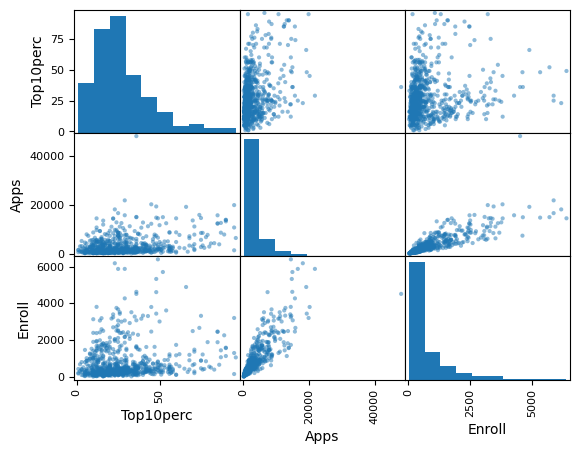

In [50]:
## Opción 1 (sugerida en el libro)
pd.plotting.scatter_matrix(college[["Top10perc", "Apps", "Enroll"]])
plt.show()

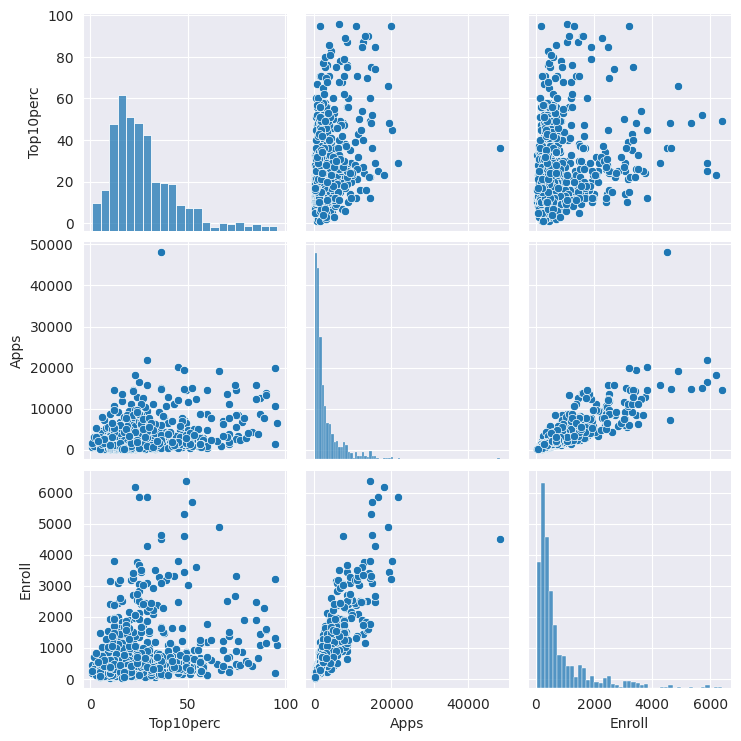

In [51]:
# Opción 2 usando seaborn

sns.set_style("darkgrid")
sns.pairplot(college[["Top10perc", "Apps", "Enroll"]])

plt.show()

Se realizo el scatterplot matrix para las variables Top10prec, Apps y Enroll para evaluar posibles relaciones entre ellas. En esta gráfica se puede observar una posible relación lineal con una tendencia a estar correlación positivamente entre las variables Apps y Enroll. En las demás relaciones se observa una alta dispersión de los datos.


## e) Boxplot de `Outstate` y `Private`


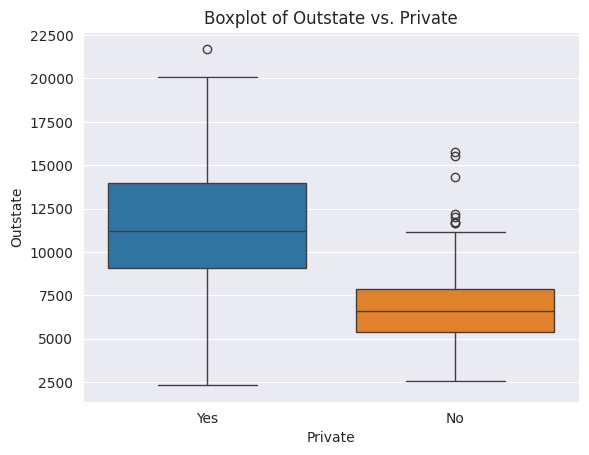

In [52]:
# Opción 1 usando seaborn
sns.set_style("darkgrid")
sns.boxplot(x="Private", y="Outstate", data=college, hue="Private")

plt.xlabel("Private")
plt.ylabel("Outstate")
plt.title("Boxplot of Outstate vs. Private")
plt.show()

La mayoría de los estudiantes son de instituciones privadas


## f) Analizando universidades `Elite`


In [53]:
college["Elite"] = pd.cut(
    college["Top10perc"], [0, 0.5, 1], labels=["No", "Yes"]
).fillna("No")
college.head(3)

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Elite
College,,,,,,,,,,,,,,,,,,,
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,No
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,No
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,No


In [54]:
college.Elite.value_counts()

No     774
Yes      3
Name: Elite, dtype: int64

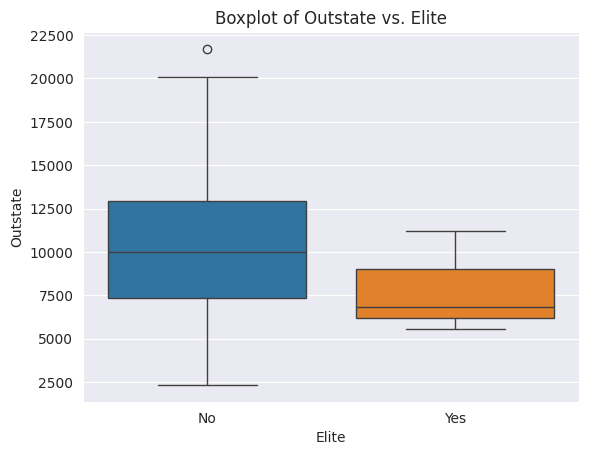

In [55]:
# Opción 2 usando plotly express
sns.boxplot(
    data=college,
    x="Elite",
    y="Outstate",
    hue="Elite",
).set_title("Boxplot of Outstate vs. Elite")
plt.show()

Hay más estudiantes que no pertenecen a Elite.


## g) Histograma de algunas variables cuantitativas


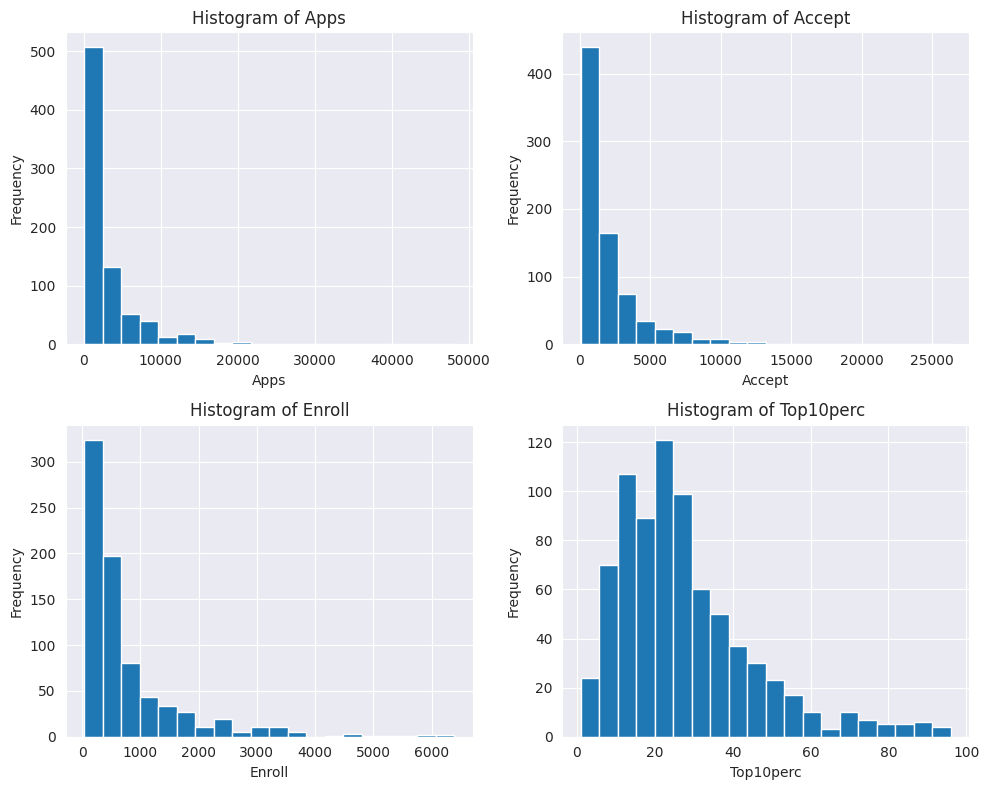

In [56]:
# Define the quantitative variables you want to plot
quantitative_vars = ["Apps", "Accept", "Enroll", "Top10perc"]

# Create subplots with 2 rows and 2 columns
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Iterate through the variables and plot histograms with different numbers of bins
for i, var in enumerate(quantitative_vars):
    row = i // 2
    col = i % 2
    ax = axes[row][col]

    # You can change the number of bins as needed
    ax.hist(
        college[var], bins=20
    )  # Change the number of bins (e.g., bins=10, bins=30) as desired
    ax.set_title(f"Histogram of {var}")
    ax.set_xlabel(var)
    ax.set_ylabel("Frequency")

# Adjust the layout for better appearance
plt.tight_layout()

# Show the plot
plt.show()

Es de esperar la distribución de los datos de las variables Apps, Accept y Enroll están sesgados hacia la izquierda y no se observan datos atípicos


## h) Exploring the data


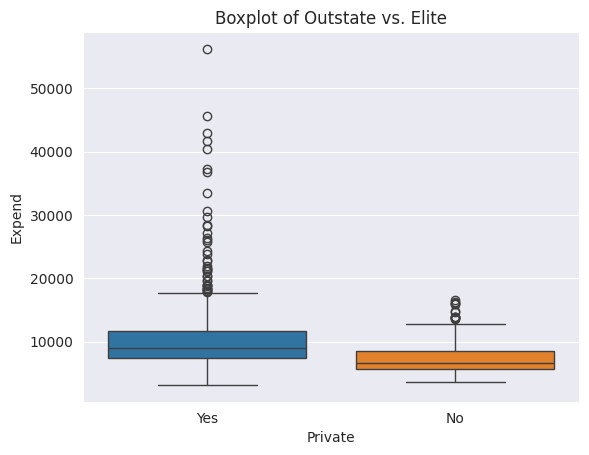

In [57]:
sns.boxplot(
    data=college,
    x="Private",
    y="Expend",
    hue="Private",
).set_title("Boxplot of Outstate vs. Elite")
plt.show()

No se observa una diferencia "significativa" entre los gastos de la institución por estudiante entre indicador Privado y Público.


In [58]:
college["Acceptance Rate"] = college["Accept"] / college["Apps"]
college["Acceptance Rate"].describe()

count    777.000000
mean       0.746928
std        0.147104
min        0.154486
25%        0.675647
50%        0.778750
75%        0.848522
max        1.000000
Name: Acceptance Rate, dtype: float64

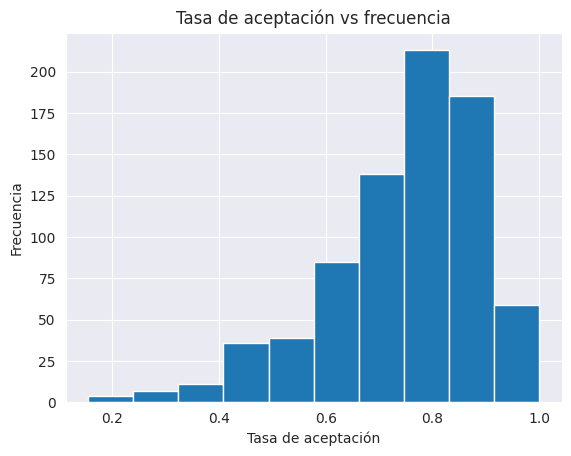

In [59]:
plt.hist(college["Acceptance Rate"])
plt.xlabel("Tasa de aceptación")
plt.ylabel("Frecuencia")
plt.title("Tasa de aceptación vs frecuencia")
plt.show()

Los resultados muestran que, en promedio, las 777 universidades tienen una tasa de aceptación del 74.69%, con una desviación estándar de 0.1471, indicando cierta variabilidad. El rango va desde una tasa de aceptación mínima del 15.45% hasta una máxima del 100%. La mediana se sitúa en el 77.88%, lo que sugiere que la mayoría de las universidades tienen tasas de aceptación superiores al 70%.


In [60]:
college["Enrollment Rate"] = college["Enroll"] / college["Accept"]
college["Enrollment Rate"].describe()

count    777.000000
mean       0.412015
std        0.133989
min        0.099754
25%        0.317204
50%        0.387419
75%        0.485674
max        1.000000
Name: Enrollment Rate, dtype: float64

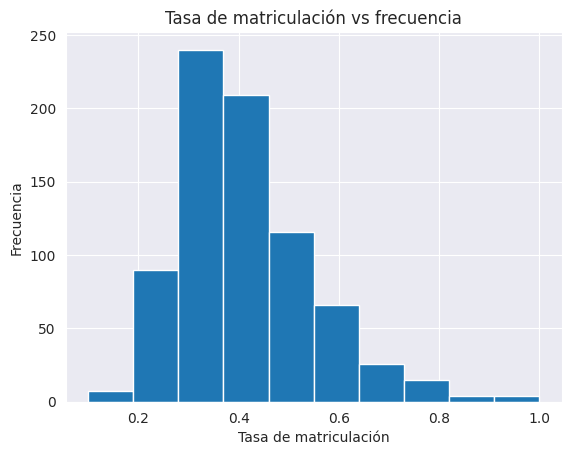

In [61]:
plt.hist(college["Enrollment Rate"])
plt.xlabel("Tasa de matriculación")
plt.ylabel("Frecuencia")
plt.title("Tasa de matriculación vs frecuencia")
plt.show()

Los resultados indican que, en promedio, las 777 universidades tienen una tasa de matriculación del 41.20%, con una desviación estándar de 0.1340, lo que muestra cierta variabilidad en las tasas de matriculación. El rango varía desde una tasa de matriculación mínima del 9.98% hasta una máxima del 100%. La mediana se encuentra en el 38.74%, lo que sugiere que la mayoría de las universidades tienen tasas de matriculación por debajo del 50%. Estos datos reflejan la diversidad en las tasas de matriculación de las instituciones educativas.


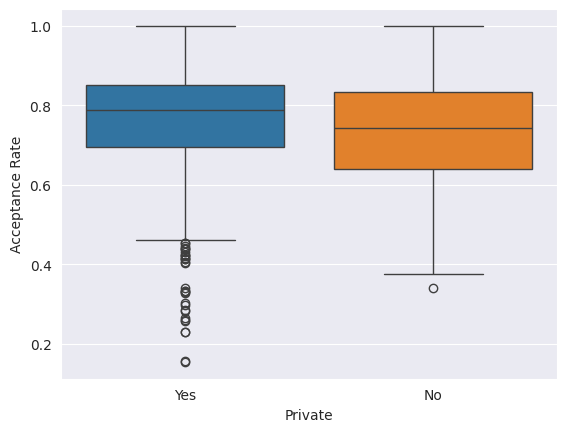

In [62]:
sns.boxplot(x="Private", y="Acceptance Rate", data=college, hue="Private")
plt.show()

A partir de este gráfico, se puede ver que, en la mayoría de casos, no hay una diferencia significativa en la tasa de aceptación de las universidades privadas con las públicas. Pero sí existen más datos atípicos en las universidades privadas que en las públicas que sugieren que hay universidades privadas que tienen una tasa de aceptación muy baja.


count     58
unique     1
top       No
freq      58
Name: Elite, dtype: object


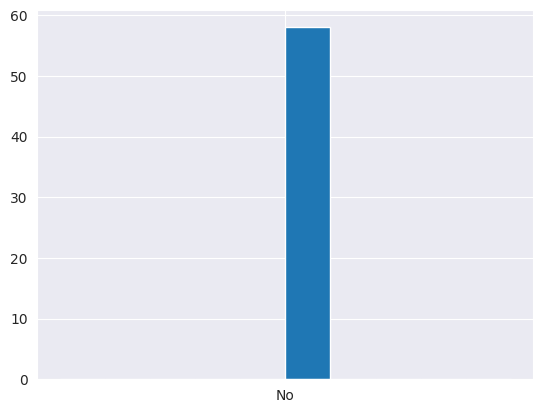

In [63]:
low_acceptance_rate_colleges = college[college["Acceptance Rate"] < 0.5]
low_acceptance_rate_colleges["Elite"].hist()
print(low_acceptance_rate_colleges["Elite"].describe())
plt.show()

Sorprendentemente, ninguna de las universidades con una tasa de aceptación menor a 0.5 es una universidad "Élite".


# Problema 14 sección 3.7 ejercicio 4


Recopilo un conjunto de datos (n = 100 observaciones) que contienen un único predictor y una respuesta cuantitativa. Luego ajusto un modelo de regresión lineal a los datos, así como una regresión cúbica separada, es decir, Y = + Beta_2X^2 + Beta_3X^3 + E.

(a) Suponga que la verdadera relación entre X e Y es lineal, es decir, Y = Beta_0 + Beta_1X + E. Considere la suma de cuadrados residual de entrenamiento (RSS) para la regresión lineal, y también la RSS de entrenamiento para la regresión cúbica. ¿Esperaríamos que uno fuera más bajo que el otro, esperaríamos que fueran iguales o no hay suficiente información para saberlo? Justifica tu respuesta

Si la verdadera relación entre X y Y es lineal (Y = Beta_0 + Beta_1X + E), entonces un modelo de regresión lineal debería ser capaz de capturar esta relación de manera más precisa que un modelo de regresión cúbica. En un modelo de regresión lineal, estamos asumiendo una relación lineal entre X y Y, lo que significa que estamos tratando de encontrar los coeficientes Beta_0 y Beta_1 que mejor se ajusten a los datos en función de una línea recta. Por lo tanto, esperaríamos que la RSS de entrenamiento para el modelo de regresión lineal fuera más baja que la RSS de entrenamiento para el modelo de regresión cúbica.

La RSS (suma de cuadrados residual) es una medida de cuánto se desvían las predicciones del modelo de los valores reales en los datos de entrenamiento. En el caso de un modelo lineal, como se asume una relación lineal entre X y Y, el modelo se ajustará de manera más cercana a los datos reales, lo que resultará en una RSS más baja en comparación con un modelo cúbico.

En un modelo de regresión cúbica, estamos tratando de encontrar los coeficientes Beta_0, Beta_2 y Beta_3 que mejor se ajusten a una relación cúbica entre X y Y, lo que introduce más flexibilidad en la forma de la relación. Si la verdadera relación es lineal, entonces este modelo cúbico puede sobreajustar los datos y, por lo tanto, la RSS de entrenamiento será mayor que en el modelo lineal.

En resumen, si la verdadera relación es lineal, esperaríamos que la RSS de entrenamiento para el modelo de regresión lineal fuera más baja que la RSS de entrenamiento para el modelo de regresión cúbica, ya que el modelo lineal se ajusta mejor a la verdadera relación.


(b) Responda (a) utilizando RSS de prueba en lugar de entrenamiento.

En este escenario, donde la verdadera relación entre X y Y es lineal, es decir, Y = Beta_0 + Beta_1X + E, esperaríamos que la RSS de prueba para la regresión lineal fuera más baja que la RSS de prueba para la regresión cúbica. Debido a:

1. Modelo más simple: La regresión lineal es un modelo más simple que la regresión cúbica. La regresión lineal tiene solo dos parámetros a estimar (Beta_0 y Beta_1), mientras que la regresión cúbica tiene tres parámetros (Beta_0, Beta_2, y Beta_3). Un modelo más simple tiende a tener un menor riesgo de sobreajuste y generaliza mejor a nuevos datos.

2. Ajuste a la verdadera relación: Dado que sabemos que la verdadera relación entre X e Y es lineal, la regresión lineal está más alineada con la verdadera relación subyacente. La regresión cúbica, al incluir términos cúbicos, intentará modelar una curvatura que no existe en los datos reales, lo que resultará en un mal ajuste.

3. Menos variabilidad: La regresión cúbica, al incluir términos cúbicos, tendrá una mayor variabilidad en la estimación de parámetros que la regresión lineal. Esto significa que los errores cuadráticos serán más grandes en la regresión cúbica, lo que se reflejará en una RSS de prueba más alta.


(c) Supongamos que la verdadera relación entre X e Y no es lineal, pero no sabemos qué tan lejos está de ser lineal. Considere el RSS de entrenamiento para la regresión lineal y también el RSS de entrenamiento para la regresión cúbica. ¿Esperaríamos que uno fuera más bajo que el otro, esperaríamos que fueran iguales o no hay suficiente información para saberlo? Justifica tu respuesta.

En este caso, estamos comparando un modelo de regresión lineal con un modelo de regresión cúbica. Cuando se trata de determinar si uno tendría un RSS de entrenamiento más bajo que el otro, o si serían iguales, debemos considerar la complejidad de los modelos y cómo se ajustan a los datos.

Un modelo de regresión cúbica es inherentemente más complejo que un modelo de regresión lineal, ya que incluye términos de tercer grado (X^3), lo que le permite capturar relaciones no lineales en los datos. El modelo de regresión lineal, por otro lado, es más simple y solo incluye un término lineal (X).

Si la verdadera relación entre X e Y no es lineal, pero no sabemos qué tan lejos está de ser lineal, es razonable esperar que el modelo de regresión cúbica tenga un RSS de entrenamiento más bajo que el modelo de regresión lineal. Esto se debe a que el modelo de regresión cúbica tiene la flexibilidad adicional para capturar patrones no lineales en los datos, lo que debería permitirle ajustarse mejor a la verdadera relación subyacente.

Sin embargo, también es importante tener en cuenta que un modelo de regresión cúbica puede ser más propenso al sobreajuste, lo que significa que podría ajustarse demasiado a los datos de entrenamiento y no generalizar bien a nuevos datos. Por lo tanto, la elección entre un modelo lineal y uno cúbico debe equilibrar la capacidad de ajustarse a los datos de entrenamiento con la capacidad de generalizar a datos no vistos.


(d) Responda (c) utilizando RSS de prueba en lugar de entrenamiento.

En este caso, si la verdadera relación entre X y Y no es lineal, pero no sabemos qué tan lejos está de ser lineal, hay varias posibilidades:

1. Si la verdadera relación es cercana a lineal: En este caso, es probable que el modelo de regresión lineal tenga un RSS de prueba más bajo que el modelo de regresión cúbica. Esto se debe a que el modelo lineal, al ser más simple, puede capturar la tendencia general de los datos sin ajustarse en exceso a pequeñas variaciones.

2. Si la verdadera relación no es lineal en absoluto: Ambos modelos pueden tener RSS de prueba similares, ya que ninguno de los modelos se ajustará adecuadamente a la verdadera relación. En este caso, podrían ser aproximadamente iguales.

3. Si la verdadera relación es altamente no lineal: Es posible que el modelo de regresión cúbica tenga un RSS de prueba más bajo, ya que tiene más flexibilidad para capturar relaciones no lineales complejas. Sin embargo, también existe el riesgo de sobreajuste en este caso.

En resumen, no hay una respuesta definitiva sin conocer la verdadera relación entre X y Y. La elección entre un modelo lineal y un modelo cúbico dependerá de la naturaleza subyacente de los datos y del equilibrio entre el sesgo y la varianza. Se podría realizar validación cruzada u otras técnicas de selección de modelos para determinar cuál de los dos modelos se ajusta mejor a los datos en ausencia de información adicional sobre la verdadera relación.


# Problema 14 sección 3.7 ejercicio 10


In [64]:
from ISLP import load_data
import statsmodels.formula.api as smf

In [65]:
Boston = load_data("Carseats")

### a) Fit a multiple regression model to predict Sales using Price, Urban, and US.


In [66]:
X = Boston[["Price", "Urban", "US", "Sales"]]
X.head()

,Price,Urban,US,Sales
0,120,Yes,Yes,9.50
1,83,Yes,Yes,11.22
2,80,Yes,Yes,10.06
3,97,Yes,Yes,7.40
4,128,Yes,No,4.15


In [67]:
model = smf.ols(formula="Sales ~ Price + Urban + US", data=X)
result = model.fit()

In [68]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Tue, 07 Nov 2023   Prob (F-statistic):           2.39e-23
Time:                        15:34:48   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       13.0435      0.651     20.036   

### (b) Provide an interpretation of each coefficient in the model. Be careful—some of the variables in the model are qualitative!


- El coeficiente de "Price" es -0.0545, es decir, por cada unidad que aumenta el precio, las ventas disminuyen en 0.0545 unidades.
- Debido a que usamos variables categóricas para las columnas "Urban" y "US", para cada columna, el modelo utiliza "k-1" niveles. Como la columna "Urban" tiene 2 niveles ("Yes" y "No"), el modelo solo utiliza 1 nivel para el valor "Yes". Lo mismo sucede para la columna "US". Es decir que para ambos casos, el modelo utiliza el nivel "No" como referencia.
  - El coeficiente de "Urban[T.Yes]" significa que "un cambio desde 'No' hasta 'Yes' disminuye en 0.0219 unidades el valor de la venta".
  - El coeficiente de "US[T.Yes]" significa que "un cambio desde 'No' hasta 'Yes' incrementa en 1.2006 unidades el valor de la venta".


### (c) Write out the model in equation form, being careful to handle the qualitative variables properly.


Sales = 13.0435 - 0.0545 _ Price - 0.0219 _ Urban[T.Yes] + 1.2006 \* US[T.Yes]


### (d) For which of the predictors can you reject the null hypothesis H0 : Bj = 0?


El valor p para todos los predictores excepto para "Urban[T.Yes]" es muy pequeño, por lo que podemos rechazar la hipótesis nula para todos los predictores excepto para "Urban[T.Yes]".


### (e) On the basis of your response to the previous question, fit a smaller model that only uses the predictors for which there is evidence of association with the outcome.


In [69]:
model2 = smf.ols(formula="Sales ~ Price + US", data=X)
result2 = model2.fit()
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Tue, 07 Nov 2023   Prob (F-statistic):           2.66e-24
Time:                        15:34:48   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.0308      0.631     20.652      0.0

### (f) How well do the models in (a) and (e) fit the data?


Ambos modelos dan un R^2 de 0.239, por lo que ambos modelos explican el 23.9% de la variabilidad de los datos. Sin embargo, por el principio de parsimonia, nos podemos quedar con el segundo modelo.


### (g) Using the model from (e), obtain 95 % confidence intervals for the coefficient(s).


- Para el intercepto, el intervalo de confianza del 95% es [11.790, 14.271]
- Para "US[T.Yes]" el intervalo de confianza del 95% es [0.692, 1.708]
- Para "Price" el intervalo de confianza del 95% es [-0.065, -0.044]


### (h) Is there evidence of outliers or high leverage observations in the model from (e)?


Debido a que la kurtosis es casi 3 (su valor real es 2.895), entonces no hay evidencia de outliers.


# Problema 14 sección 3.7 ejercicio 13


In [70]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import statsmodels.api as sm
import statsmodels.formula.api as smf

13. In this exercise you will create some simulated data and will fit simple linear regression models to it. Make sure to use the default random number generator with seed set to 1 prior to starting part (a) to ensure consistent results.


(a) Using the normal() method of your random number generator, create a vector, x, containing 100 observations drawn from a N(0, 1) distribution. This represents a feature, X.

(b) Using the normal() method, create a vector, eps, containing 100 observations drawn from a N(0, 0.25) distribution—a normal distribution with mean zero and variance 0.25.


In [71]:
def calculate_Y(x, eps):
    return -1 + 0.5 * x + eps

In [72]:
random.seed(1)
a = 100
x = np.array([random.normalvariate(0, 1) for _ in range(a)])
eps = np.array([random.normalvariate(0, np.sqrt(0.25)) for _ in range(a)])
y = calculate_Y(x, eps)

El vector x contiene 100 valores simulados que siguen una distribución normal estándar. Esto significa que los valores de x se distribuyen alrededor de 0 con una dispersión de 1.

El vector eps representa el término de error en un modelo de regresión. En una regresión lineal simple, este término de error (epsilon) se añade a la relación lineal entre la variable independiente X y la variable dependiente Y para introducir aleatoriedad y capturar la variabilidad no explicada por la variable independiente. La elección de una distribución normal con media cero y varianza 0.25 sugiere que, en promedio, el error es cero, y la variabilidad de los errores es menor en comparación con una distribución normal estándar. Esto implica que la dispersión de los errores es más pequeña, lo que puede ser relevante en el contexto del modelo de regresión.


(c) Using x and eps, generate a vector y according to the model
Y = −1+0.5X + e (3.39)
What is the length of the vector y? What are the values of β0 and β1 in this linear model?


In [73]:
length_y = len(y)

beta0 = -1
beta1 = 0.5

print(f"the length of the vector Y is: {length_y}")
print(f"β0 (intercept): {beta0}")
print(f"β1 (coeficiente para X): {beta1}")

the length of the vector Y is: 100
β0 (intercept): -1
β1 (coeficiente para X): 0.5


(d) Create a scatterplot displaying the relationship between x and y. Comment on what you observe.


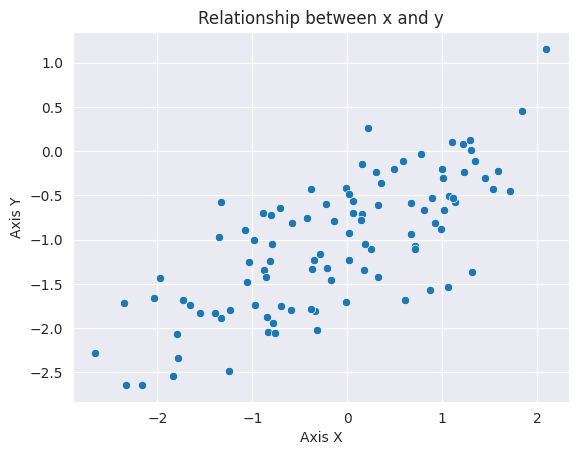

In [74]:
sb.scatterplot(x=x, y=y, marker="o")
plt.xlabel("Axis X")
plt.ylabel("Axis Y")
plt.title("Relationship between x and y")
plt.show()

Se observa una relación lineal positiva entre los datos


(e) Fit a least squares linear model to predict y using x. Comment on the model obtained. How do βˆ0 and βˆ1 compare to β0 and β1?


In [75]:
X = sm.add_constant(x)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.550
Model:                            OLS   Adj. R-squared:                  0.545
Method:                 Least Squares   F-statistic:                     119.8
Date:                Tue, 07 Nov 2023   Prob (F-statistic):           1.08e-18
Time:                        15:34:48   Log-Likelihood:                -72.455
No. Observations:                 100   AIC:                             148.9
Df Residuals:                      98   BIC:                             154.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9733      0.051    -19.168      0.0

De los resultados generados podemos decir:

- R-squared (R-cuadrado): Es una medida de la bondad del ajuste del modelo. En este caso, el R-cuadrado es 0.550, lo que significa que aproximadamente el 55% de la variabilidad en la variable dependiente "y" se explica por las variables independientes en el modelo.
- Method (Método): Se utilizó el método de Mínimos Cuadrados para ajustar el modelo a los datos.
- No. Observations (Número de Observaciones): Hay 100 observaciones en el conjunto de datos que se utilizó para ajustar el modelo.
- Df Residuals (Grados de Libertad de los Residuos): Indica el número de grados de libertad asociados con los residuos del modelo. En este caso, hay 98 grados de libertad para los residuos.
- Df Model (Grados de Libertad del Modelo): Representa el número de grados de libertad asociados con el modelo. En este caso, hay 1 grado de libertad para el modelo.
- Covariance Type (Tipo de Covarianza): Se indica que el tipo de covarianza utilizado es "nonrobust", lo que significa que no se han aplicado correcciones robustas a los errores estándar.

Los coeficientes del modelro fueron:

- const: El coeficiente para la constante es -0.9733, lo que es el valor estimado de "y" cuando todas las variables independientes son iguales a cero.
- x1: El coeficiente para la variable independiente "x1" es 0.5099, lo que indica el cambio esperado en "y" por cada unidad de cambio en "x1".


(f) Display the least squares line on the scatterplot obtained in (d). Draw the population regression line on the plot, in a diferent color. Use the legend() method of the axes to create an appropriate legend.


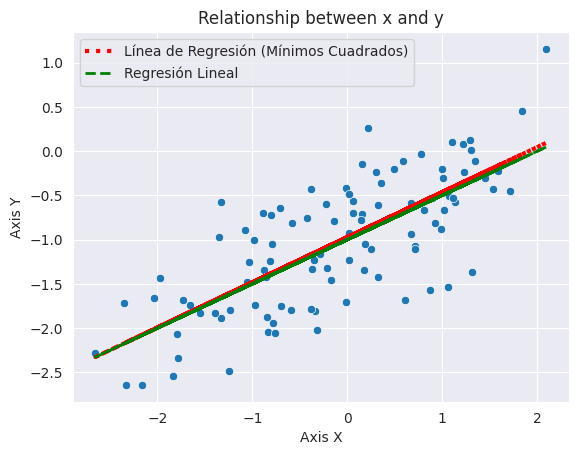

In [76]:
a, b = results.params
sb.scatterplot(x=x, y=y, marker="o")
y_pred_min_cuad = a + b * x
y_real = beta0 + beta1 * x
plt.plot(
    x,
    y_pred_min_cuad,
    color="red",
    linestyle=":",
    label="Línea de Regresión (Mínimos Cuadrados)",
    lw=3,
)
plt.plot(x, y_real, color="green", linestyle="--", label="Regresión Lineal", lw=2)
plt.xlabel("Axis X")
plt.ylabel("Axis Y")
plt.title("Relationship between x and y")
plt.legend()
plt.show()

(g) Now fit a polynomial regression model that predicts y using x and x2. Is there evidence that the quadratic term improves the model ft? Explain your answer.


In [77]:
data = {"x": x, "y": y}
res2 = smf.ols(formula="y ~ np.power(x,2) + x", data=data).fit()
print(res2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.541
Method:                 Least Squares   F-statistic:                     59.41
Date:                Tue, 07 Nov 2023   Prob (F-statistic):           1.43e-17
Time:                        15:34:49   Log-Likelihood:                -72.406
No. Observations:                 100   AIC:                             150.8
Df Residuals:                      97   BIC:                             158.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.9869      0.067    -14.

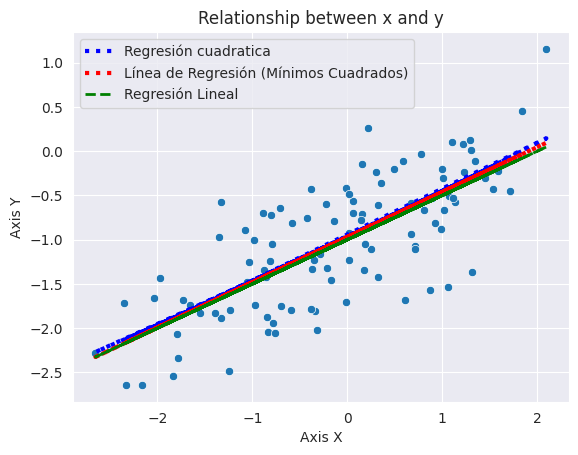

In [78]:
d, e, f = res2.params
sb.scatterplot(x=x, y=y, marker="o")
y_pred_min_cuad = a + b * x
y_real = beta0 + beta1 * x
y_pred_quadratic = d + f * x + e * np.power(x, 2)
plt.plot(
    x, y_pred_quadratic, color="blue", linestyle=":", label="Regresión cuadratica", lw=3
)
plt.plot(
    x,
    y_pred_min_cuad,
    color="red",
    linestyle=":",
    label="Línea de Regresión (Mínimos Cuadrados)",
    lw=3,
)
plt.plot(x, y_real, color="green", linestyle="--", label="Regresión Lineal", lw=2)
plt.xlabel("Axis X")
plt.ylabel("Axis Y")
plt.title("Relationship between x and y")
plt.legend()
plt.show()

¿Existe evidencia de que el término cuadrático mejora el modelo ft? Explica tu respuesta.

El coeficiente del término cuadrático es muy pequeño (0.0120) y su p-valor es alto (0.758), lo que sugiere que no hay una relación fuerte entre x^2 y Y en el modelo.

El R-squared y el R² ajustado en el modelo con el término cuadrático son relativamente similares a los de un modelo lineal simple. Esto indica que el modelo lineal ya explica la mayor parte de la variabilidad en los datos, y la adición del término cuadrático no mejora significativamente la capacidad del modelo para ajustarse a los datos.

La probabilidad F es extremadamente baja (1.43e-17), lo que indica que el modelo en su conjunto (con ambos términos) es estadísticamente significativo, pero esto no necesariamente significa que el término cuadrático es necesario para explicar la variabilidad en Y.

Por tanto, según los resultados presentados, no hay evidencia sólida de que el término cuadrático (x^2) mejore significativamente el modelo de regresión en comparación con un modelo lineal simple. El coeficiente del término cuadrático es pequeño y no es estadísticamente significativo, y el R-squared no mejora sustancialmente con la inclusión de este término. Por lo tanto, en este contexto, el término cuadrático no parece ser necesario para explicar la relación entre X y Y.


(h) Repeat (a)–(f) after modifying the data generation process in such a way that there is less noise in the data. The model (3.39) should remain the same. You can do this by decreasing the variance of the normal distribution used to generate the error term" in (b). Describe your results.


the length of the vector Y is: 100
β0 (intercept): -1
β1 (coeficiente para X): 0.5


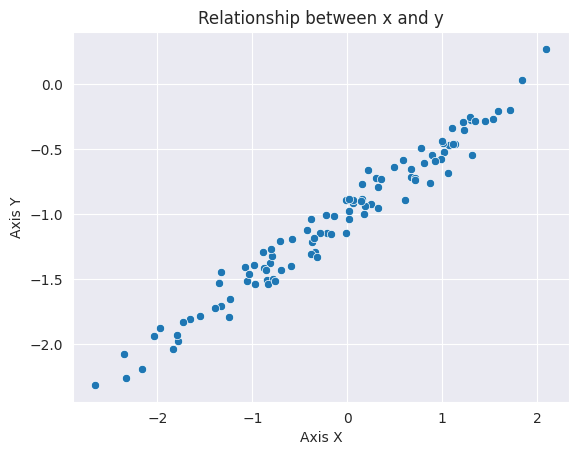

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     2904.
Date:                Tue, 07 Nov 2023   Prob (F-statistic):           1.24e-74
Time:                        15:34:49   Log-Likelihood:                 88.489
No. Observations:                 100   AIC:                            -173.0
Df Residuals:                      98   BIC:                            -167.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9947      0.010    -97.945      0.0

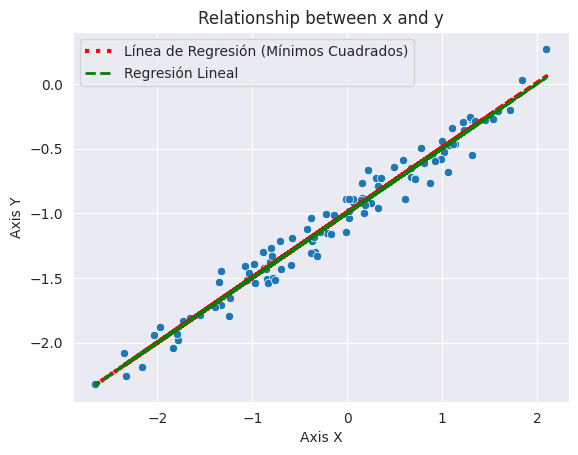

In [79]:
random.seed(1)
a = 100
x = np.array([random.normalvariate(0, 1) for _ in range(a)])
eps = np.array([random.normalvariate(0, np.sqrt(0.01)) for _ in range(a)])
y = calculate_Y(x, eps)

length_y = len(y)

beta0 = -1
beta1 = 0.5

print(f"the length of the vector Y is: {length_y}")
print(f"β0 (intercept): {beta0}")
print(f"β1 (coeficiente para X): {beta1}")

sb.scatterplot(x=x, y=y, marker="o")
plt.xlabel("Axis X")
plt.ylabel("Axis Y")
plt.title("Relationship between x and y")
plt.show()


X = sm.add_constant(x)
model = sm.OLS(y, X)
results_less_noisy = model.fit()
print(results_less_noisy.summary())

a, b = results_less_noisy.params
sb.scatterplot(x=x, y=y, marker="o")
y_pred_min_cuad = a + b * x
y_real = beta0 + beta1 * x
plt.plot(
    x,
    y_pred_min_cuad,
    color="red",
    linestyle=":",
    label="Línea de Regresión (Mínimos Cuadrados)",
    lw=3,
)
plt.plot(x, y_real, color="green", linestyle="--", label="Regresión Lineal", lw=2)
plt.xlabel("Axis X")
plt.ylabel("Axis Y")
plt.title("Relationship between x and y")
plt.legend()
plt.show()

Los resultados específicos de la regresión:

- const: El valor estimado de la intersección es -0.9947, con un error estándar de 0.010. El valor "t" es el estadístico t, que mide cuántas desviaciones estándar está la estimación del coeficiente del valor cero. El valor "P>|t|" es el valor p asociado al estadístico t. En este caso, el valor p es muy cercano a cero (0.000), lo que indica que el coeficiente constante es estadísticamente significativo.

- x1: El valor estimado del coeficiente de "x1" es 0.5020, con un error estándar de 0.009. El estadístico t es 53.885, y el valor p es muy cercano a cero (0.000), lo que indica que el coeficiente de "x1" es estadísticamente significativo.

Por tanto, esta tabla muestra los resultados de una regresión lineal simple en la que se utilizó "x1" para predecir la variable dependiente "y". El modelo tiene un alto R-cuadrado y los coeficientes son estadísticamente significativos. Lo que evidencia que ante unos datos más homogeneos se obtiene una regresión lineal con mejor desempeño.


(i) Repeat (a)–(f) after modifying the data generation process in such a way that there is more noise in the data. The model (3.39) should remain the same. You can do this by increasing the variance of the normal distribution used to generate the error term " in (b). Describe your results.


the length of the vector Y is: 100
β0 (intercept): -1
β1 (coeficiente para X): 0.5


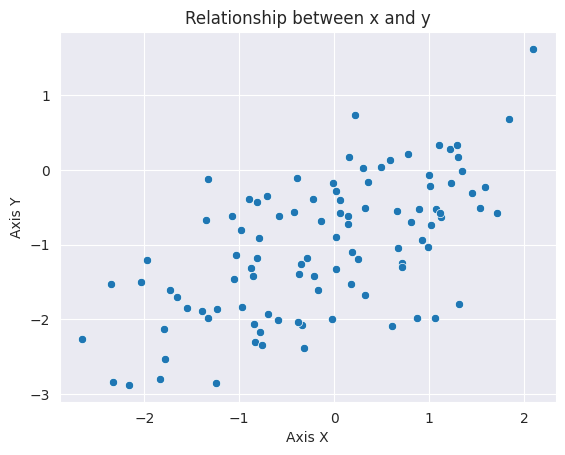

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.383
Model:                            OLS   Adj. R-squared:                  0.377
Method:                 Least Squares   F-statistic:                     60.87
Date:                Tue, 07 Nov 2023   Prob (F-statistic):           6.69e-12
Time:                        15:34:50   Log-Likelihood:                -107.11
No. Observations:                 100   AIC:                             218.2
Df Residuals:                      98   BIC:                             223.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9622      0.072    -13.400      0.0

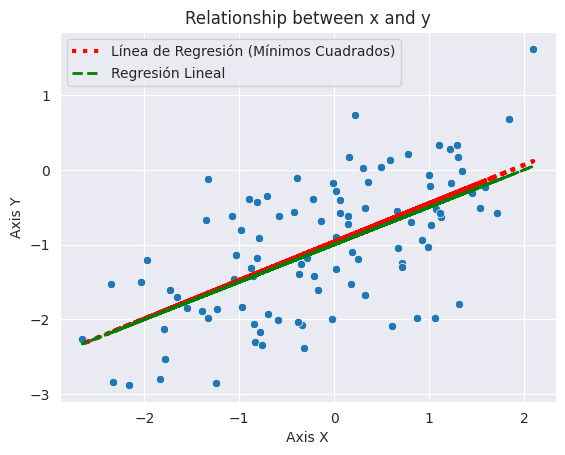

In [80]:
random.seed(1)
a = 100
x = np.array([random.normalvariate(0, 1) for _ in range(a)])
eps = np.array([random.normalvariate(0, np.sqrt(0.5)) for _ in range(a)])
y = calculate_Y(x, eps)

length_y = len(y)

beta0 = -1
beta1 = 0.5

print(f"the length of the vector Y is: {length_y}")
print(f"β0 (intercept): {beta0}")
print(f"β1 (coeficiente para X): {beta1}")

sb.scatterplot(x=x, y=y, marker="o")
plt.xlabel("Axis X")
plt.ylabel("Axis Y")
plt.title("Relationship between x and y")
plt.show()


X = sm.add_constant(x)
model = sm.OLS(y, X)
results_noisy = model.fit()
print(results_noisy.summary())

a, b = results_noisy.params
sb.scatterplot(x=x, y=y, marker="o")
y_pred_min_cuad = a + b * x
y_real = beta0 + beta1 * x
plt.plot(
    x,
    y_pred_min_cuad,
    color="red",
    linestyle=":",
    label="Línea de Regresión (Mínimos Cuadrados)",
    lw=3,
)
plt.plot(x, y_real, color="green", linestyle="--", label="Regresión Lineal", lw=2)
plt.xlabel("Axis X")
plt.ylabel("Axis Y")
plt.title("Relationship between x and y")
plt.legend()
plt.show()

El valor de R-cuadrado es 0.383, lo que indica que el modelo de regresión lineal explica aproximadamente el 38.3% de la variabilidad en la variable dependiente "y". En otras palabras, el modelo no explica la mayor parte de la variabilidad en "y", ya que R-cuadrado es relativamente bajo.

El valor del estadístico F es 60.87, y su valor p asociado (Prob (F-statistic)) es muy cercano a cero (6.69e-12). Esto sugiere que el modelo en su conjunto es estadísticamente significativo, lo que significa que al menos una de las variables independientes es relevante para predecir la variable dependiente.

Por tanto, el modelo es significativo, pero el R-cuadrado sugiere que no explica una gran parte de la variabilidad en "y".


(j) What are the confidence intervals for β0 and β1 based on the original data set, the noisier data set, and the less noisy data set? Comment on your results.


In [81]:
original_b0, original_b1 = results.conf_int(alpha=0.05, cols=None)
less_noisy_b0, less_noisy_b1 = results_less_noisy.conf_int(alpha=0.05, cols=None)
noisy_b0, noisy_b1 = results_noisy.conf_int(alpha=0.05, cols=None)

In [82]:
print(f"el intervalo de confianza para el data set original de β0 es: {original_b0}")
print(f"el intervalo de confianza para el data set original de β1 es: {original_b1}")
print(
    f"el intervalo de confianza para el data con menos ruido de β0 es: {less_noisy_b0}"
)
print(
    f"el intervalo de confianza para el data con menos ruido de β1 es: {less_noisy_b1}"
)
print(f"el intervalo de confianza para el data set original de β0 es: {noisy_b0}")
print(f"el intervalo de confianza para el data set original de β1 es: {noisy_b1}")

el intervalo de confianza para el data set original de β0 es: [-1.07406523 -0.87253578]
el intervalo de confianza para el data set original de β1 es: [0.41742068 0.60228409]
el intervalo de confianza para el data con menos ruido de β0 es: [-1.01481305 -0.97450716]
el intervalo de confianza para el data con menos ruido de β1 es: [0.48348414 0.52045682]
el intervalo de confianza para el data set original de β0 es: [-1.10474406 -0.81973837]
el intervalo de confianza para el data set original de β1 es: [0.38321521 0.64465154]


In [83]:
diff_orignal_b0 = original_b0[1] - original_b0[0]
diff_orignal_b1 = original_b1[1] - original_b1[0]

diff_less_noisy_b0 = less_noisy_b0[1] - less_noisy_b0[0]
diff_less_noisy_b1 = less_noisy_b1[1] - less_noisy_b1[0]

diff_noisy_b0 = noisy_b0[1] - noisy_b0[0]
diff_noisy_b1 = noisy_b1[1] - noisy_b1[0]

In [84]:
print(f"rango del intervalo de confianza original b0: {diff_orignal_b0}")
print(f"rango del intervalo de confianza original b1: {diff_orignal_b1}")
print(f"rango del intervalo de confianza less noisy b0: {diff_less_noisy_b0}")
print(f"rango del intervalo de confianza less noisy b1: {diff_less_noisy_b1}")
print(f"rango del intervalo de confianza noisy b0: {diff_noisy_b0}")
print(f"rango del intervalo de confianza noisy b1: {diff_noisy_b1}")

rango del intervalo de confianza original b0: 0.20152945699938984
rango del intervalo de confianza original b1: 0.18486340641561166
rango del intervalo de confianza less noisy b0: 0.04030589139987795
rango del intervalo de confianza less noisy b1: 0.036972681283122366
rango del intervalo de confianza noisy b0: 0.2850056913062228
rango del intervalo de confianza noisy b1: 0.2614363365394474


Los intervalos de confianza son una medida de la incertidumbre asociada con las estimaciones de estos parámetros.

En este caso, se están presentando intervalos de confianza para los coeficientes de regresión, β0 y β1, en tres situaciones diferentes: el dataset original, el dataset con menos ruido y el dataset ruidoso. Además, se proporciona el rango de estos intervalos de confianza para cada caso. Aquí está la interpretación:

- Intervalo de Confianza para β0 en el Dataset Original: [-1.07406523, -0.87253578]

Esto significa que, con un cierto nivel de confianza (generalmente 95%), el valor real del coeficiente β0 caerá en este intervalo. El valor más probable de β0 es -0.9723005, y existe cierta incertidumbre alrededor de este valor.

- Intervalo de Confianza para β1 en el Dataset Original: [0.41742068, 0.60228409]

De manera similar, esto indica que el valor real del coeficiente β1 en el dataset original estará dentro de este intervalo con cierto nivel de confianza. El valor más probable de β1 es 0.50985239.

- Intervalo de Confianza para β0 en el Dataset con Menos Ruido: [-1.01481305, -0.97450716]

Este intervalo se refiere al dataset con menos ruido y muestra una menor variabilidad en el valor de β0 en comparación con el dataset original. El valor más probable de β0 es -0.99466010 en este caso no está dentro del rango.

- Intervalo de Confianza para β1 en el Dataset con Menos Ruido: [0.48348414, 0.52045682]

Similar al caso anterior, este intervalo es más estrecho en el dataset con menos ruido, lo que indica menos incertidumbre en el valor de β1. El valor más probable de β1 es 0.50197048 en este caso.

- Rango del Intervalo de Confianza Original para β0: 0.20152945699938984

El rango representa la amplitud del intervalo de confianza para β0 en el dataset original. En este caso, el rango es de aproximadamente 0.202, lo que indica la extensión de la incertidumbre en torno al valor de β0 en el dataset original.

- Rango del Intervalo de Confianza Original para β1: 0.18486340641561166

De manera similar, este valor representa la amplitud del intervalo de confianza para β1 en el dataset original, que es de aproximadamente 0.185.

- Rango del Intervalo de Confianza Menos Ruido para β0: 0.04030589139987795

En el dataset con menos ruido, el rango del intervalo de confianza para β0 es mucho más estrecho, lo que indica una menor incertidumbre en la estimación de β0 en este caso.

- Rango del Intervalo de Confianza Menos Ruido para β1: 0.036972681283122366

De manera similar al caso anterior, el rango del intervalo de confianza para β1 en el dataset con menos ruido es más estrecho, indicando menor incertidumbre en la estimación de β1.

- Rango del Intervalo de Confianza Ruidoso para β0: 0.2850056913062228

En el dataset ruidoso, el rango del intervalo de confianza para β0 es más amplio en comparación con el dataset original, lo que refleja una mayor incertidumbre en la estimación
de β0 en el dataset ruidoso.

- Rango del Intervalo de Confianza Ruidoso para β1: 0.2614363365394474

De manera similar, el rango del intervalo de confianza para β1 en el dataset ruidoso es más amplio, lo que indica una mayor incertidumbre en la estimación de β1 en el dataset ruidoso.

Por tanto, los intervalos de confianza y sus rangos reflejan la incertidumbre en las estimaciones de los coeficientes de regresión, con intervalos más estrechos indicando una estimación más precisa y menos incertidumbre, y intervalos más amplios indicando mayor incertidumbre en las estimaciones. Los datos ruidosos tienden a tener intervalos más amplios debido a la mayor variabilidad y el impacto del ruido en las estimaciones. Cuando el error es pequeño el rango del intervalo de confianza es más pequeño y cuando el error es más grande el rango del intervalo de confianza es mayor.


# Problema 14 sección 3.7 ejercicio 14


In [85]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

In [86]:
rng = np.random.default_rng(10)
x1 = rng.uniform(0, 1, size=100)
x2 = 0.5 * x1 + rng.normal(size=100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size=100)

a) La última línea corresponde a la creación de un modelo lineal en el que y es una función de x1 y x2. Escriba la forma del modelo lineal. ¿Cuáles son los coeficientes de regresión?


In [87]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

Aquí utilizo las dos librerias de numpy y statsmodels para generar la regresión lineal


In [88]:
# Generar los datos
rng = np.random.default_rng(10)
x1 = rng.uniform(0, 1, size=100)
x2 = 0.5 * x1 + rng.normal(size=100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size=100)

# Crear el modelo de regresión lineal
model = LinearRegression().fit(np.column_stack((x1, x2)), y)

# Extraer los coeficientes
intercept = model.intercept_
coefficients = model.coef_

print("Intercept:", intercept)
print("Coefficients:", coefficients)

Intercept: 1.957909291136691
Coefficients: [1.6153677 0.9427767]


In [89]:
# Generar los datos
rng = np.random.default_rng(10)
x1 = rng.uniform(0, 1, size=100)
x2 = 0.5 * x1 + rng.normal(size=100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size=100)

df = pd.DataFrame({"x1": x1, "x2": x2, "y": y})

model = sm.OLS(y, sm.add_constant(df[["x1", "x2"]])).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     19.89
Date:                Tue, 07 Nov 2023   Prob (F-statistic):           5.76e-08
Time:                        15:34:50   Log-Likelihood:                -130.62
No. Observations:                 100   AIC:                             267.2
Df Residuals:                      97   BIC:                             275.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9579      0.190     10.319      0.0

Los coeficientes y su interpretación:

- Coeficiente de la constante (const): 1.9579

Este es el valor del intercepto o la constante de la ecuación de regresión. Representa el valor de la variable dependiente (y) cuando todas las variables independientes (x1 y x2) son iguales a cero.

- Coeficiente de x1: 1.6154

Este coeficiente indica cómo cambia la variable dependiente (y) cuando la variable independiente x1 aumenta en una unidad, manteniendo constante el valor de x2. En este caso, un incremento de una unidad en x1 se asocia con un aumento de 1.6154 unidades en y.

- Coeficiente de x2: 0.9428

Este coeficiente indica cómo cambia la variable dependiente (y) cuando la variable independiente x2 aumenta en una unidad, manteniendo constante el valor de x1. Sin embargo, el p-valor (P>|t|) para x2 es 0.259, lo que significa que el coeficiente no es estadísticamente significativo a un nivel de significancia común (como 0.05). Esto sugiere que no hay evidencia sólida de que x2 tenga un efecto significativo en y en este modelo.

- La ecuación de regresión sería:

y = 1.9579 + 1.6154 _ x1 + 0.9428 _ x2

El valor de R-squared (R^2) es 0.291, lo que indica que el modelo de regresión explica el 29.1% de la variabilidad en la variable dependiente y. El valor de R-squared ajustado (Adj. R-squared) es 0.276, que es similar pero ajusta por el número de variables independientes en el modelo. El F-statistic mide la bondad de ajuste del modelo en su conjunto, y el valor bajo del p-valor (5.76e-08) sugiere que el modelo es globalmente significativo.

La no significancia de x2 podría indicar que esta variable no es importante para predecir y en el modelo o que se necesita una muestra más grande para detectar su efecto con confianza.


b) ¿Cuál es la correlación entre x1 y x2? Crear un diagrama de dispersión mostrando la relación entre las variables.


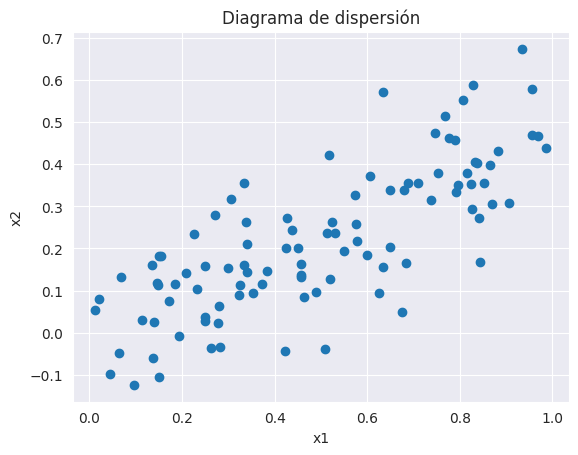

Correlación entre x1 y x2: 0.772324497691354


In [90]:
# Generar los datos
rng = np.random.default_rng(10)
x1 = rng.uniform(0, 1, size=100)
x2 = 0.5 * x1 + rng.normal(size=100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size=100)

# Calcular la correlación
corr = np.corrcoef(x1, x2)[0, 1]

# Crear el diagrama de dispersión
plt.scatter(x1, x2)
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Diagrama de dispersión")
plt.show()

print("Correlación entre x1 y x2:", corr)

El valor de la correlación es 0.772324497691354, lo que sugiere que hay una correlación positiva fuerte entre x1 y x2.


C) Usando estos datos, ajuste una regresión de mínimos cuadrados para predecir el uso de y x1 y x2. Describa los resultados obtenidos. Que es B0, B1 y B2 ? Cómo se relacionan con los verdaderos B0, B1 y B3 ? ¿Puedes rechazar la hipótesis nula de que H0 : B1 = 0 ? Puedes rechazar la hipótesis nula de que H0 : B2 = 0 ?


In [91]:
# Generar los datos
rng = np.random.default_rng(10)
x1 = rng.uniform(0, 1, size=100)
x2 = 0.5 * x1 + rng.normal(size=100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size=100)

# Crear un DataFrame con los datos
df = pd.DataFrame({"x1": x1, "x2": x2, "y": y})

# Ajustar el modelo de regresión lineal
model = sm.OLS(y, sm.add_constant(df[["x1", "x2"]])).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     19.89
Date:                Tue, 07 Nov 2023   Prob (F-statistic):           5.76e-08
Time:                        15:34:51   Log-Likelihood:                -130.62
No. Observations:                 100   AIC:                             267.2
Df Residuals:                      97   BIC:                             275.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9579      0.190     10.319      0.0

R-squared es 0.291, lo que significa que aproximadamente el 29.1% de la variabilidad en y se explica por el modelo. En este caso, hay tres coeficientes:

- B0 (const): Es el coeficiente de la constante o el término independiente. En este modelo, B0 es aproximadamente 1.9579.
- B1 (x1): Es el coeficiente asociado a la variable predictora x1. En este modelo, B1 es aproximadamente 1.6154.
- B2 (x2): Es el coeficiente asociado a la variable predictora x2. En este modelo, B2 es aproximadamente 0.9428.

P-valores (P>|t|): Los valores p son una medida de la significación estadística de los coeficientes. Se utilizan para evaluar si los coeficientes son estadísticamente diferentes de cero. Los valores p se usan para probar las hipótesis nulas. En este caso, se presentan los valores p para B0, B1 y B2.

- H0 : B1 = 0 (Hipótesis nula para B1): El valor p para B1 es 0.003, que es menor que un nivel de significancia típico (como 0.05). Esto significa que puedes rechazar la hipótesis nula de que B1 = 0. En otras palabras, x1 tiene un efecto estadísticamente significativo en y.

- H0 : B2 = 0 (Hipótesis nula para B2): El valor p para B2 es 0.259, que es mayor que un nivel de significancia típico. Esto significa que no puedes rechazar la hipótesis nula de que B2 = 0. En otras palabras, x2 no tiene un efecto estadísticamente significativo en y en el nivel de significancia seleccionado.

En conclusión, los resultados indican que B0 es el intercepto, B1 es el coeficiente asociado a x1, y B2 es el coeficiente asociado a x2. Se rechaza la hipótesis nula de que B1 = 0, lo que sugiere que x1 tiene un efecto estadísticamente significativo en y. Sin embargo, no se rechaza la hipótesis nula de que B2 = 0, lo que sugiere que x2 no tiene un efecto estadísticamente significativo en y en el nivel de significancia seleccionado.


d) Ahora ajuste una regresión de mínimos cuadrados para predecir y usando solo x1.
Comenta tus resultados. ¿Puedes rechazar la hipótesis nula H0: B1 = 0 ?


In [92]:
# Generar los datos
# Generar los datos
rng = np.random.default_rng(10)
x1 = rng.uniform(0, 1, size=100)
x2 = 0.5 * x1 + rng.normal(size=100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size=100)

# Crear un DataFrame con los datos
df = pd.DataFrame({"x1": x1, "x2": x2, "y": y})

# Ajustar el modelo de regresión lineal
model = sm.OLS(y, sm.add_constant(df["x1"])).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     38.39
Date:                Tue, 07 Nov 2023   Prob (F-statistic):           1.37e-08
Time:                        15:34:51   Log-Likelihood:                -131.28
No. Observations:                 100   AIC:                             266.6
Df Residuals:                      98   BIC:                             271.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9371      0.189     10.242      0.0

El valor p para la prueba de hipótesis de B1 es 0.000, lo que es menor que el nivel de significancia de 0.05. Por lo tanto, se puede rechazar la hipótesis nula de que B1 = 0. Esto indica que x1 tiene un efecto significativo en y.


e) Ahora ajuste una regresión de mínimos cuadrados para predecir y usando solo x2.
Comenta tus resultados. ¿Puedes rechazar la hipótesis nula H0: B1 = 0 ?


In [93]:
# Generar los datos
rng = np.random.default_rng(10)
x1 = rng.uniform(0, 1, size=100)
x2 = 0.5 * x1 + rng.normal(size=100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size=100)

# Crear un DataFrame con los datos
df = pd.DataFrame({"x1": x1, "x2": x2, "y": y})

# Ajustar el modelo de regresión lineal
model = sm.OLS(y, sm.add_constant(df["x2"])).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     27.99
Date:                Tue, 07 Nov 2023   Prob (F-statistic):           7.43e-07
Time:                        15:34:51   Log-Likelihood:                -135.24
No. Observations:                 100   AIC:                             274.5
Df Residuals:                      98   BIC:                             279.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.3239      0.154     15.124      0.0

El valor p para la prueba de hipótesis de B1 es 0.000, lo que es menor que el nivel de significancia de 0.05. Por lo tanto, se puede rechazar la hipótesis nula de que B1 = 0. Esto indica que x2 tiene un efecto significativo en y.


g) Supongamos que obtenemos una observación adicional, que fue por desgracia
medición incorrecta. Usamos la función np.concatenate() para agregar
esta observación adicional a cada uno de x1, x2 y y.

Reajuste los modelos lineales de (c) a (e) utilizando estos nuevos datos. ¿Qué
efecto tiene esta nueva observación en cada uno de los modelos?
En cada modelo, ¿es esta observación un valor atípico? Un alto apalancamiento
punto? Ambos? Explique sus respuestas.


Ajuste del punto C


In [94]:
# Generar los datos
rng = np.random.default_rng(10)
x1 = rng.uniform(0, 1, size=100)
x2 = 0.5 * x1 + rng.normal(size=100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size=100)

x1 = np.concatenate([x1, [0.1]])
x2 = np.concatenate([x2, [0.8]])
y = np.concatenate([y, [6]])

# Ajustar la regresión de mínimos cuadrados
X = np.column_stack((np.ones_like(x1), x1, x2))
beta = np.linalg.lstsq(X, y, rcond=None)[0]

# Imprimir los resultados
print("Coeficientes de la regresión:")
print("Intercepto:", beta[0])
print("Coeficiente de x1:", beta[1])
print("Coeficiente de x2:", beta[2])

Coeficientes de la regresión:
Intercepto: 2.061791259758457
Coeficiente de x1: 0.8575448183694927
Coeficiente de x2: 2.2663234876910465


Ajuste del punto e


In [95]:
# Generar los datos
rng = np.random.default_rng(10)
x1 = rng.uniform(0, 1, size=100)
x2 = 0.5 * x1 + rng.normal(size=100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size=100)

x1 = np.concatenate([x1, [0.1]])
x2 = np.concatenate([x2, [0.8]])
y = np.concatenate([y, [6]])

# Ajustar la regresión de mínimos cuadrados
X = np.column_stack((np.ones_like(x2), x2))
beta = np.linalg.lstsq(X, y, rcond=None)[0]

# Imprimir los resultados
print("Coeficientes de la regresión:")
print("Intercepto:", beta[0])
print("Coeficiente de x1:", beta[1])

Coeficientes de la regresión:
Intercepto: 2.2840118640185625
Coeficiente de x1: 3.1458486275754862


Se considera que se generó un gran cambio en los coeficientes de los modelos, lo que puede implicar que el valor agregado en la variable x1 es un valor atipico generando este gran cambio. Esto lo podemos evidenciar en el modelo del punto C Vs el modelo del punto C ajustado. Para el punto e seria lo contrario, no afecta tanto el modelo, lo que significa que el dato agregado en la variable x2 que se agregaron no son atipicos
